In [3]:
import tqdm 
from tqdm import tqdm

import csv
import numpy as np
import pandas as pd
import scipy.optimize as sp
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.io import fits 
from astropy.io import ascii
from astropy.table import QTable, Table
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord

AttributeError: module 'astropy.coordinates' has no attribute 'representation'

In [ ]:
EXERCISE: 
* extinction law graph changes with redshift 
* take sn spectrum (simulated redshift), say at z=1, and look at reddening if all assumed to be at redshift of the host galaxy.  
    * can do this in asnana, only for all at host or all in mw. not the case if it’s affected
* 1) take sn time series and do that? as an exercise (i.e. calculate its color reddening + distance effects assuming it goes through certain amount, say 5, galaxies each at particular redshift wiht a particular a_v extinction law) 
    * do this WITHOUT ABSORPTION 
    * A_V etinction curve is shifted with redshift (you just need to shift with (1+z))
* 2) wavelength dependence of interstellar dust extinction, read either mathis or fitzpatrick 
    * mw is R_V of 3.1
    * pick R_V of 3.1, extinct the light curves both at 1) host galaxy and 2) all the foreground galaxies. 

* there are like 18 million small things (how does energy redshift, area under curve redshift, etc. etc.)
    * masao has c++ code that he can send, but i should do first

* how distances are measured, which are corrected for by color and x1, but color doesn’t mean same thing anymore if you’re putting extinction at different redsifts
    * color 

In [2]:
nz = np.load('nz.npy')[0]
zbin = np.load('nz.npy')[1]

In [3]:
nz, zbin

(array([0.03636836, 0.3125281 , 0.73825772, 1.34802722, 1.56488855,
        1.87272073, 1.59666091, 1.24431744, 0.64019303, 0.34939603,
        0.22375533, 0.07288659]),
 array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
        1.15]))

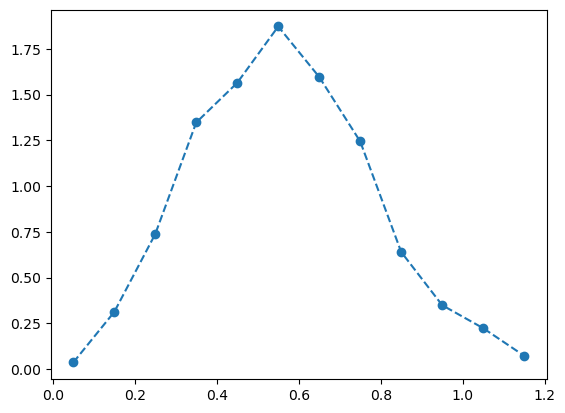

In [10]:
plt.plot(zbin, nz, 'o--')

In [ ]:
### 1) apply nz binning and weight * (A_V vs. z extinction curve <- assuming R_V is 3.1 and that each goes thru 5 gals at random z < z_sn)

### 2) convert A_V to reddening expected in each color bin



In [5]:
lc_template

### question: from the lc_template, we have the filters 

,;epoch,U,B,V,R,I,Y,J,H,K
0,-20.0,73.7467,74.2374,73.6345,73.0829,72.3734,71.5946,70.9369,69.9150,68.8001
1,-19.0,6.8970,7.6110,7.6800,7.6080,7.6200,7.6457,7.6821,7.6731,7.5824
2,-18.0,4.4250,5.1390,5.2080,5.1360,5.1470,5.1734,5.2028,5.2009,5.1077
3,-17.0,3.2980,4.0120,4.0810,4.0100,4.0210,4.0484,4.0690,4.0760,3.9795
4,-16.0,2.5600,3.2750,3.3440,3.2720,3.2830,3.3114,3.3220,3.3392,3.2391
...,...,...,...,...,...,...,...,...,...,...
106,86.0,4.0230,3.7480,3.2690,3.3030,3.6770,3.4040,4.8167,3.2543,3.4668
107,87.0,4.0410,3.7630,3.2950,3.3360,3.7240,3.4624,4.8727,3.3081,3.5228
108,88.0,4.0600,3.7790,3.3220,3.3680,3.7700,3.5182,4.9266,3.3600,3.5766
109,89.0,4.0780,3.7940,3.3480,3.4000,3.8170,3.5732,4.9800,3.4117,3.6300


In [879]:
lc_template = pd.read_csv('lc_template.dat', delim_whitespace=True)
lc_template

,;epoch,U,B,V,R,I,Y,J,H,K
0,-20.0,73.7467,74.2374,73.6345,73.0829,72.3734,71.5946,70.9369,69.9150,68.8001
1,-19.0,6.8970,7.6110,7.6800,7.6080,7.6200,7.6457,7.6821,7.6731,7.5824
2,-18.0,4.4250,5.1390,5.2080,5.1360,5.1470,5.1734,5.2028,5.2009,5.1077
3,-17.0,3.2980,4.0120,4.0810,4.0100,4.0210,4.0484,4.0690,4.0760,3.9795
4,-16.0,2.5600,3.2750,3.3440,3.2720,3.2830,3.3114,3.3220,3.3392,3.2391
...,...,...,...,...,...,...,...,...,...,...
106,86.0,4.0230,3.7480,3.2690,3.3030,3.6770,3.4040,4.8167,3.2543,3.4668
107,87.0,4.0410,3.7630,3.2950,3.3360,3.7240,3.4624,4.8727,3.3081,3.5228
108,88.0,4.0600,3.7790,3.3220,3.3680,3.7700,3.5182,4.9266,3.3600,3.5766
109,89.0,4.0780,3.7940,3.3480,3.4000,3.8170,3.5732,4.9800,3.4117,3.6300


In [3]:
###### ----- STEPS ----- ######

### 1) apply nz binning and weight * (A_V vs. z extinction curve <- assuming R_V is 3.1 and that each goes thru 5 gals at random z < z_sn)
    ## a) at every redshift (pick 5 random ones) of host galaxy:
        # i) redshift the curve to this redshift (or redshift diff, i.e. shift forward & BACK each time to closer redshift) & 
           # extinct the curve (get flux) based on how much extinction there is at that particular redshift (dk if it's integrated??) 

    ## b) now that the supernova is at us (redshift 0), apply the bandpass filter & time (over dayss?) & area of DES etc to calculate observed flux.
        # i) question: are the des flux estimates those received? or has anything been "un-applied"? 

    ## c) now obtain supernova spectrum (flux vs. wavelength) that we observe based on extinction and telescope effects. 

    ## d) the A_v's should add up to 0.05 for all the combination of the galaxies 

    ## e) compare this with the case that sn is extinguished ONLY at host galaxy. A_V. 

### 2) (calculate using a model A_V, what extinguished flux is. ^ isnt this #1?) get A_V curve from flux (how?). convert A_V to reddening expected in each color bin
    ## a) use an R_V of 3.1 to convert A_V to E(B-V). 
    ## b) is this where the weighting for nz comes in??? 


### 3) compare color excess E(B-V) in each redshift bin (?) to the observed color excess in redshift bin for DES. 

###### ------- ###### 

### denominator is hard: need to multiply the snflux_1a (<- this is all we care abt) by transmission curves (des, get from astropy?) 
    # this is where the integration comes in 

### to check: 
sn @ redshift 0, put it at 10 pc -> -19 magnitude 

# ^ will need to redshift properly?

### check gary's notes.. 



SyntaxError: invalid syntax (2646967900.py, line 30)

In [4]:
""" A) First tackle local galaxy ONLY. """
    # redshift z = 0.6 
    # at one point in time (energy vs. wavelength) 

snflux_1a = pd.read_csv('snflux_1a.dat', delim_whitespace=True, names=["day", "wvl", "flux"])
    ## col1 = day
    ## col2 = wavelenth (Ang?)
    ## col3 = flux
    ## evolution (3d space): flux vs. wavelength, all of that is a slice in time. 
"""
phase coverage: -20 to 85 d past B maximum
wavelength coverage: 0.1 (100 nm) to 2.5 micron (2500 nm) 
light curve template: UBVRIYJHK
number of spectra incorporated: 1000+
last updated: October 19, 2007
"""
snflux_1a

,day,wvl,flux
0,-20.0,1000.0,1.300029e-38
1,-20.0,1010.0,1.300029e-38
2,-20.0,1020.0,1.300029e-38
3,-20.0,1030.0,1.300029e-38
4,-20.0,1040.0,1.300029e-38
...,...,...,...
254501,85.0,24960.0,2.846820e-12
254502,85.0,24970.0,2.849611e-12
254503,85.0,24980.0,2.852218e-12
254504,85.0,24990.0,2.854645e-12


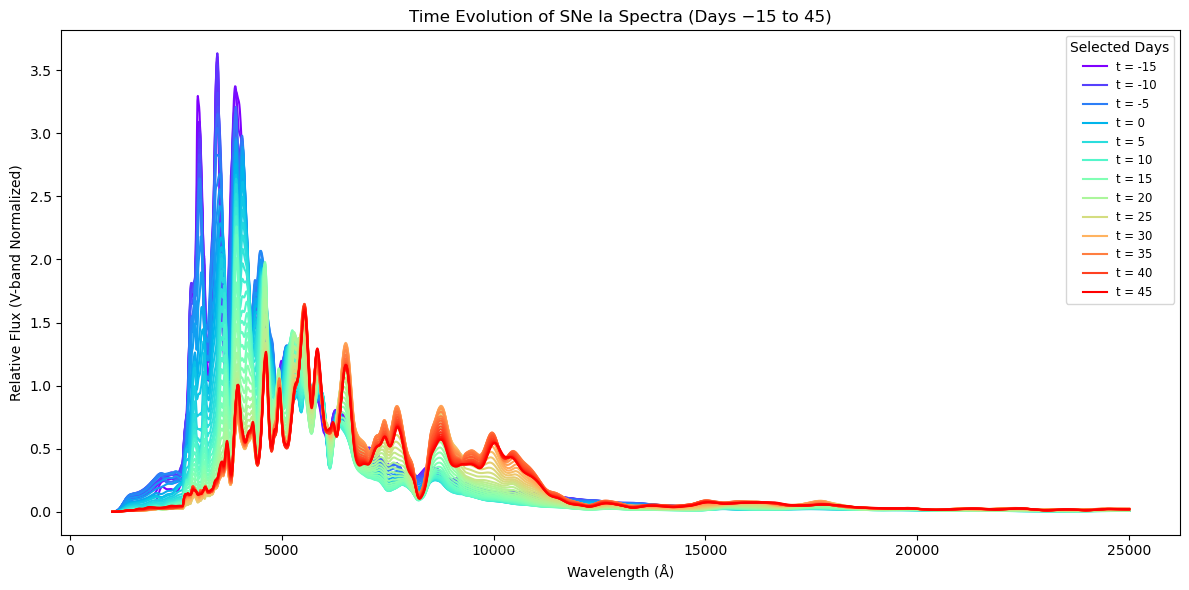

In [32]:
import numpy as np  # Just to ensure np.linspace is available
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

df = snflux_1a

# Define V-band wavelength range
v_min = 5000
v_max = 6000

# Normalize each day's flux to the V-band flux
def get_vband_flux(group):
    vband_flux = group[(group['wvl'] >= v_min) & (group['wvl'] <= v_max)]['flux'].mean()
    group['vnorm_flux'] = group['flux'] / vband_flux if vband_flux > 0 else 0
    return group

df = df.groupby('day').apply(get_vband_flux)

# Filter for days between -15 and 45
df_subset = df[(df['day'] >= -15) & (df['day'] <= 45)]

# Recompute list of days and use rainbow colormap
days = sorted(df_subset['day'].unique())
colors = cm.rainbow(np.linspace(0, 1, len(days)))

# Plot
plt.figure(figsize=(12, 6))
for i, day in enumerate(days):
    sub = df_subset[df_subset['day'] == day]
    label = f"t = {int(day)}" if i % 5 == 0 else None  # Label every 5th day
    plt.plot(sub['wvl'], sub['vnorm_flux'], color=colors[i], label=label)

# Colorbar
sm = cm.ScalarMappable(cmap='rainbow', norm=mcolors.Normalize(vmin=min(days), vmax=max(days)))
# cbar = plt.colorbar(sm)
cbar.set_label('Day')

# Legend
plt.legend(title='Selected Days', fontsize='small', loc='upper right')

# Axis labels and title
plt.xlabel("Wavelength (Å)")
plt.ylabel("Relative Flux (V-band Normalized)")
plt.title("Time Evolution of SNe Ia Spectra (Days −15 to 45)")

plt.tight_layout()
plt.show()


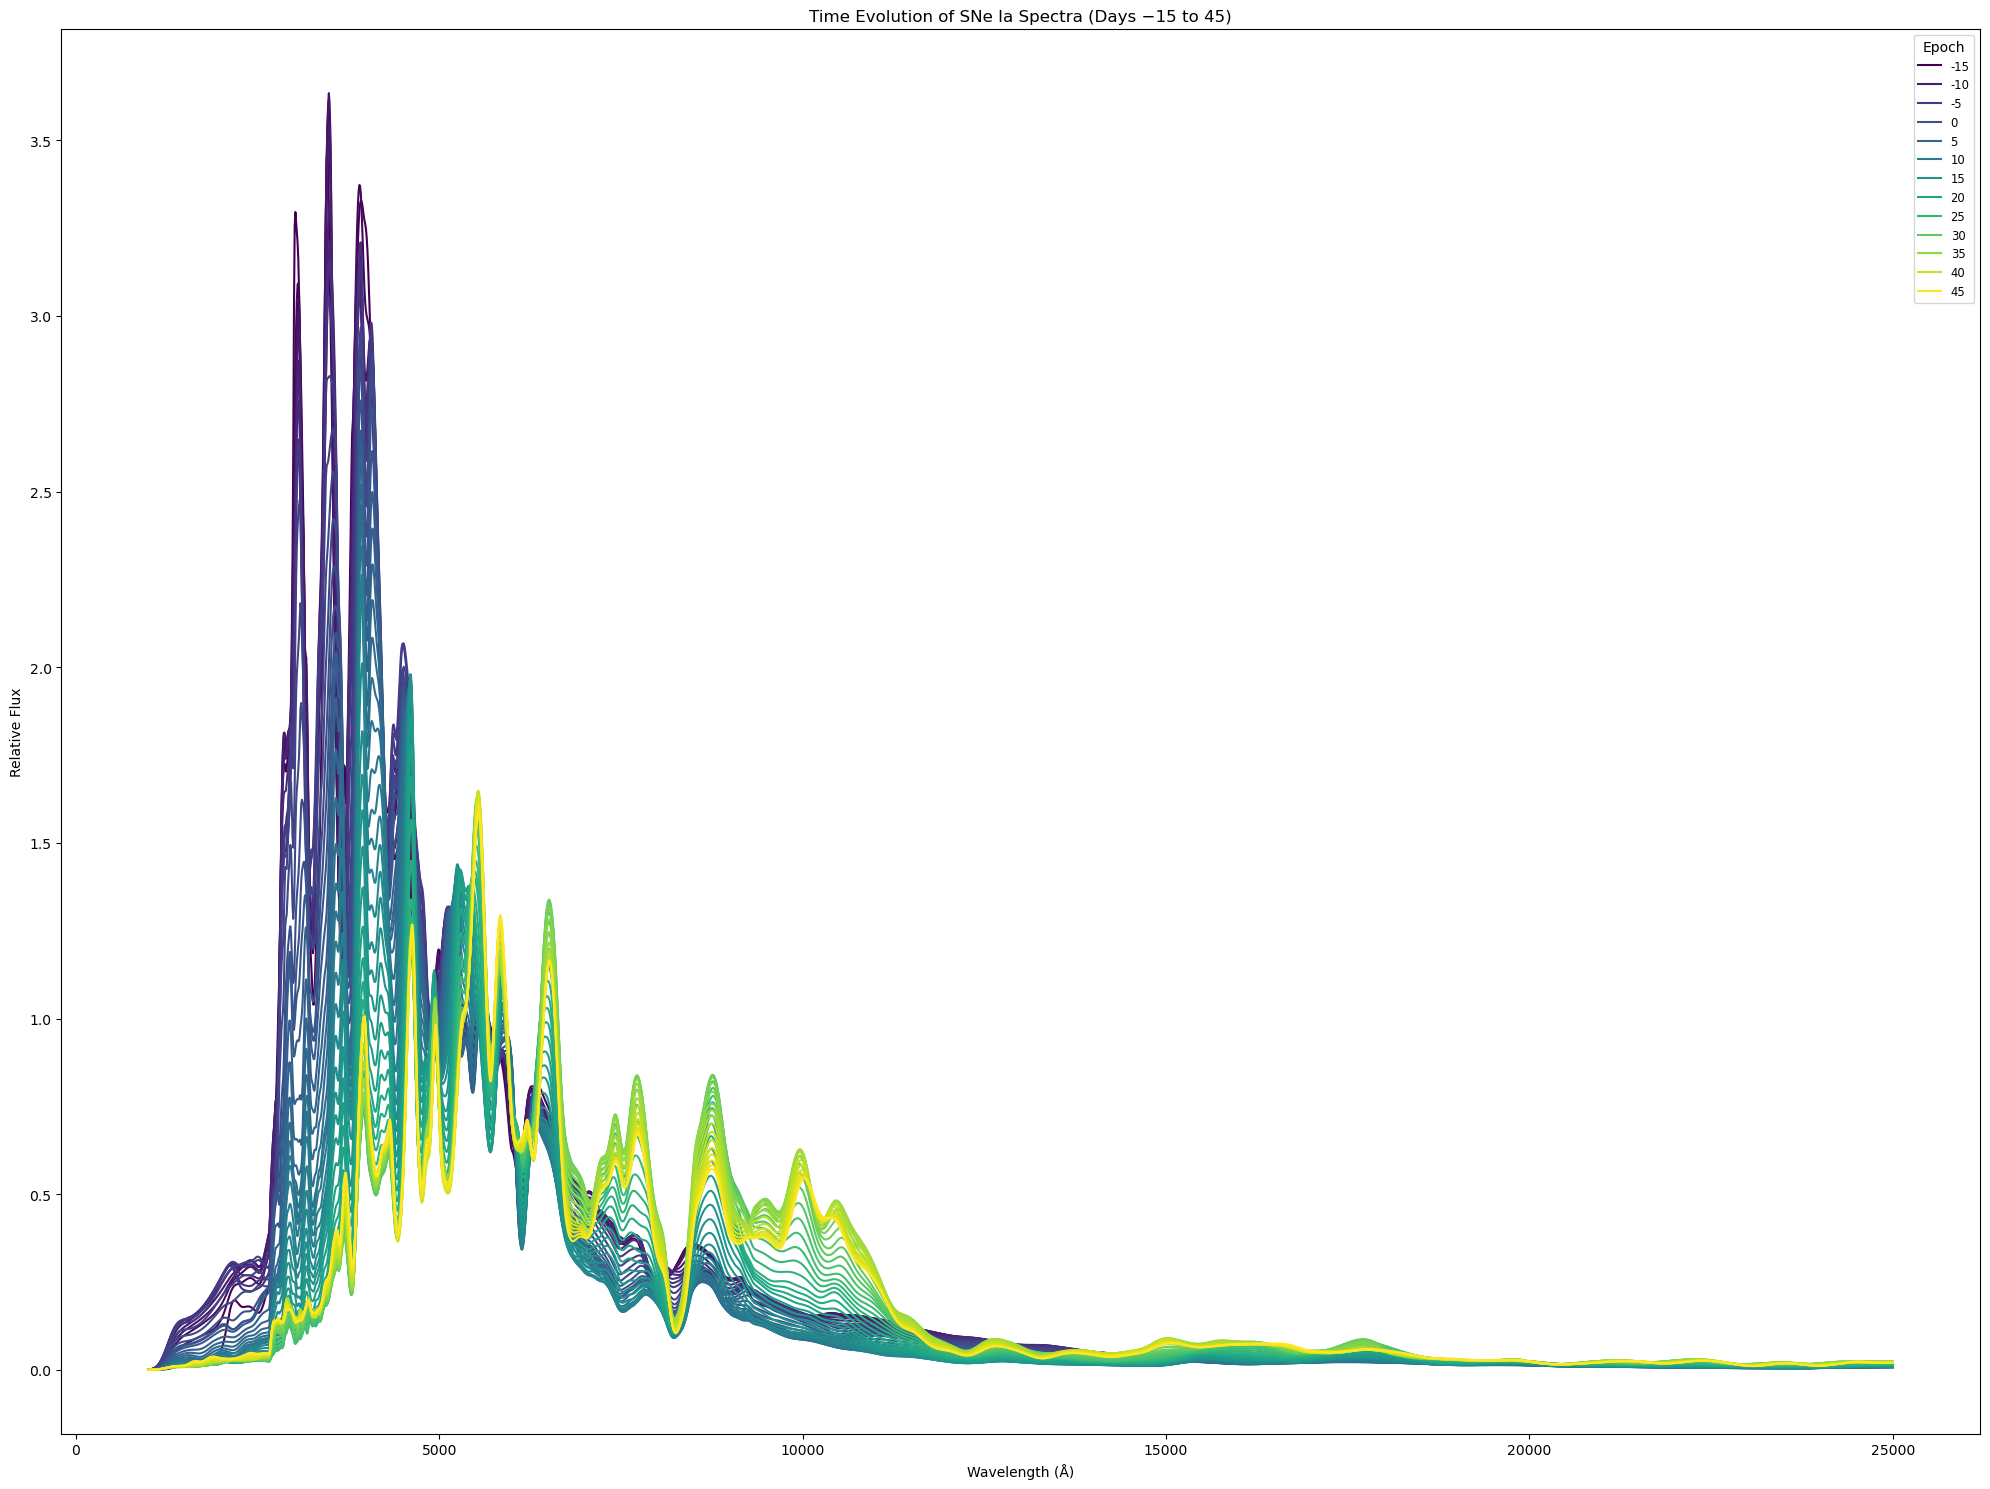

In [36]:
df = snflux_1a
# Define V-band wavelength range (adjust if needed)
v_min = 5000
v_max = 6000

# Normalize each day's flux to the V-band flux
def get_vband_flux(group):
    vband_flux = group[(group['wvl'] >= v_min) & (group['wvl'] <= v_max)]['flux'].mean()
    group['vnorm_flux'] = group['flux'] / vband_flux if vband_flux > 0 else 0
    return group

df = df.groupby('day').apply(get_vband_flux)

# Filter for days between -15 and 45
df_subset = df[(df['day'] >= -15) & (df['day'] <= 45)]

# Recompute list of days and colormap
days = sorted(df_subset['day'].unique())
colors = cm.viridis(np.linspace(0, 1, len(days)))

# Plot
plt.figure(figsize=(20, 15))
for i, day in enumerate(days):
    sub = df_subset[df_subset['day'] == day]
    label = f"{int(day)}" if i % 5 == 0 else None  # Label every 5th day
    plt.plot(sub['wvl'], sub['vnorm_flux'], color=colors[i], label=label)

# Colorbar
sm = cm.ScalarMappable(cmap='rainbow', norm=mcolors.Normalize(vmin=min(days), vmax=max(days)))
# cbar = plt.colorbar(sm)
cbar.set_label('Day')

# Legend
plt.legend(title='Epoch', fontsize='small', loc='upper right')

# Axis labels and title
plt.xlabel("Wavelength (Å)")
plt.ylabel("Relative Flux")
plt.title("Time Evolution of SNe Ia Spectra (Days −15 to 45)")

plt.tight_layout()
plt.show()

In [93]:
import numpy as np
import synphot
import astropy.units as u
from astropy.table import Table
from dust_extinction.parameter_averages import CCM89, F99
from synphot import units, config
from synphot import SourceSpectrum,SpectralElement,Observation,ReddeningLaw
from synphot.models import BlackBodyNorm1D
from synphot.spectrum import BaseUnitlessSpectrum
from synphot.reddening import ExtinctionCurve
from astroquery.simbad import Simbad
from astroquery.mast import Observations
import astropy.visualization
from synphot.models import Empirical1D
from extinction import ccm89, apply
import scipy

Text(0, 0.5, 'flux')

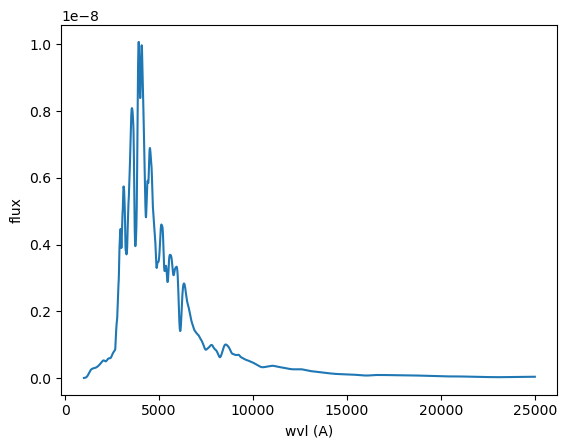

In [8]:
runningmax = 0    # 1.0070995e-08
day = None        # -1

# for d in np.arange(-10, 20): 
#     cond = snflux_1a['day'] == d
#     plt.plot(snflux_1a['wvl'][cond], snflux_1a['flux'][cond])
#     max = snflux_1a['flux'][cond].max()
#     if max > runningmax: 
#         runningmax = max
#         day = d

cond = snflux_1a['day'] == -1
plt.plot(snflux_1a['wvl'][cond], snflux_1a['flux'][cond])
plt.xlabel('wvl (A)')
plt.ylabel('flux')

# normalize so that m = -19 at z = 0, at 10 pc. formula: M = m - 5 log_10 (D_L / 10 pc) 
    # integral (f d\lam) = area under curve... = total flux. need to figure out L = integral of all this stuff to obtain d_L

## STEP 1: EXTINCTION & REDSHIFTING

In [9]:
def make_sp_norm_model(day, plot=True): 
    cond = snflux_1a['day'] == day
    wavelength = snflux_1a['wvl'][cond].values
    flux = snflux_1a['flux'][cond].values
    
    # source spectrum normalized to -19.3 
    model = Empirical1D(points=wavelength, lookup_table=flux)
    sp = SourceSpectrum(model, wave_unit='angstrom', flux_unit=units.FLAM)
    
    vega = SourceSpectrum.from_vega()
    vmag = -19.3
    
    v_band = SpectralElement.from_filter('johnson_v')
    sp_norm = sp.normalize(vmag * units.VEGAMAG, v_band, vegaspec=vega)

    if plot == True: 
        sp_norm.plot(left=10, right=25000, flux_unit='flam', title=f'normed sn ia for day {day}')

    return sp_norm

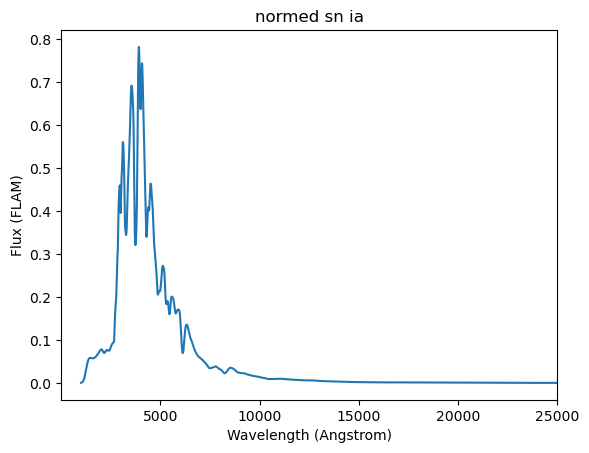

In [10]:
""" A) Apply extinction from local galaxy. B) Then redshift by z=0.6 to see what the light looks like when reaches us. """

cond = snflux_1a['day'] == -1
wavelength = snflux_1a['wvl'][cond].values
flux = snflux_1a['flux'][cond].values

# source spectrum normalized to -19.3 
model = Empirical1D(points=wavelength, lookup_table=flux)
sp = SourceSpectrum(model, wave_unit='angstrom', flux_unit=units.FLAM)

vega = SourceSpectrum.from_vega()
vmag = -19.3

v_band = SpectralElement.from_filter('johnson_v')
sp_norm = sp.normalize(vmag * units.VEGAMAG, v_band, vegaspec=vega)
sp_norm.plot(left=10, right=25000, flux_unit='flam', title='normed sn ia')

### extinction 
def extinct(sp_norm, wvl, Av, Rv=3.1): 
    """inputs: sp_norm, wavelength, Av, Rv
    outputs: wavelength, fluxes (flam) from sp_ext, sp_ext
    """
    ext = CCM89(Rv=Rv)
    wvl = wavelength*u.Angstrom

    ex = ReddeningLaw(ext).extinction_curve(Av / ext.Rv, wavelengths=wvl)
    sp_ext = sp_norm*ex

    return wvl, sp_ext(wvl, flux_unit=units.FLAM), sp_ext 
         
def redshift(spec, wvl, z, sp, option='sp'): 
    """intputs: fluxes (=spec), wavelength, z, sp, option='sp' or 'man'
    outputs: 
    - if sp: wvl_obs, fluxes from spz, spz, wvl
    - if man: wvl_obs, f_obs
    """
    if option == 'man':         # this is right
        wvl_obs = wvl * (1+z)        
        f_obs = spec / (1+z)
        return wvl_obs, f_obs 

    if option == 'sp': 
        wvl_obs = wvl * (1+z)
        # spz = SourceSpectrum(sp.model, z, z_type='conserve_flux')
        spz = SourceSpectrum(sp.model, z)      ## typically flux not preserved
        return wvl_obs, spz(wvl, flux_unit=units.FLAM), spz, wvl    


## both the wavelength AND flux are affected by redshift: 
    # new_wvl = wvl * (1+z)
    # new_flux = flux / (1+z)
    

#### A) Local Extinction Only: 

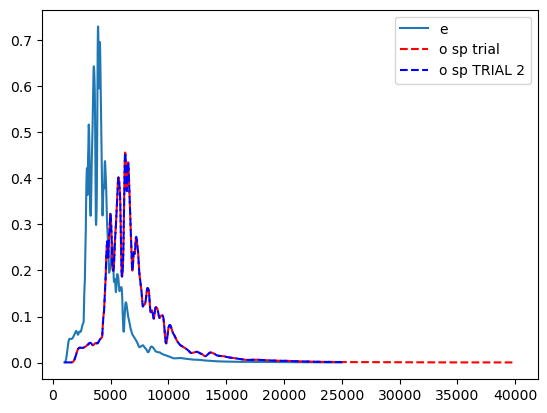

In [75]:
# for z = 0.6: 
""" A) Apply extinction from local galaxy. B) Then redshift by z=0.6 to see what the light looks like when reaches us. """
res = extinct(sp_norm, wavelength, Av=0.05, Rv=3.1)
res_z = redshift(res[1], res[0], 0.6, res[2], option='sp')
res_z_man = redshift(res[1], res[0], 0.6, res[2], option='man')

plt.plot(res[0], res[1], label='e')
# plt.plot(res_z[0], res_z[1], label='o sp')
plt.plot(res_z[0], res_z[2](res_z[0], flux_unit=units.FLAM), 'r--', label='o sp trial')     ## cuts off at og pt 
plt.plot(res_z[-1], res_z[2](res_z[-1], flux_unit=units.FLAM), 'b--', label='o sp TRIAL 2') ##same
# plt.plot(res_z_man[0], res_z_man[1], label='o, manual')
plt.legend()

#### B) Local + Intergalactic Extinction: 


In [183]:
# gal 0 = host 
z0 = 0.6
res0 = extinct(sp_norm, wavelength, Av=0.05, Rv=3.1)     # z = 0.6

# gal 1
z1 = 0.3
dz1 = z0-z1
res0_gal1 = redshift(res0[1], res0[0], z0-z1, res0[2], option='sp')            # z = 0.3
res1_gal1 = extinct(res0_gal1[2], res0_gal1[-1].value, Av=0.02, Rv=3.1)

# gal 2 
z2 = 0.12
dz2 = z1-z2
res1_gal2 = redshift(res1_gal1[1], res1_gal1[0], z1-z2, res1_gal1[2], option='sp')            # z = 0.12
res2_gal2 = extinct(res1_gal2[2], res1_gal2[-1].value, Av=0.002, Rv=3.1)

# observation (z=0) 
z3 = 0 
dz3 = z2-z3
res2_obs = redshift(res2_gal2[1], res2_gal2[0], z2-z3, res2_gal2[2], option='sp')

res2_obs

(<Quantity [ 1120. ,  1131.2,  1142.4, ..., 27977.6, 27988.8, 28000. ] Angstrom>,
 <Quantity [0.00035904, 0.00035549, 0.000352  , ..., 0.00140874, 0.00140637,
            0.00140401] FLAM>,
 <Quantity [ 1000.,  1010.,  1020., ..., 24980., 24990., 25000.] Angstrom>)

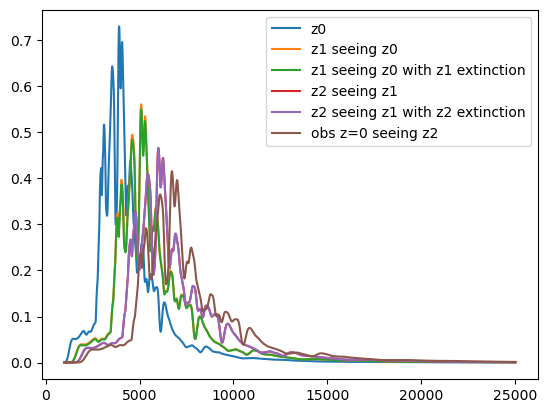

In [128]:
plt.plot(res[0], res[1], label='z0')
plt.plot(res0_gal1[-1], res0_gal1[2](res0_gal1[-1], flux_unit=units.FLAM), label='z1 seeing z0')
plt.plot(res1_gal1[0], res1_gal1[1], label='z1 seeing z0 with z1 extinction')
plt.plot(res1_gal2[-1], res1_gal2[2](res1_gal2[-1], flux_unit=units.FLAM), label='z2 seeing z1')
plt.plot(res2_gal2[0], res2_gal2[1], label='z2 seeing z1 with z2 extinction')
plt.plot(res2_obs[-1], res2_obs[2](res2_obs[-1], flux_unit=units.FLAM), label='obs z=0 seeing z2')

plt.legend()

#### C) Functions for Extinction & Redshift

In [11]:
def local(sp_norm, wavelength, z=0.6, Av=0.05, Rv=3.1): 
    """returns og wvl, flux in flam, at ultimate observation point (z=0), sp spectrum. """
    
    res = extinct(sp_norm, wavelength, Av=Av, Rv=Rv)
    res_z = redshift(res[1], res[0], z, res[2], option='sp')

    return res_z[0], res_z[2](res_z[0], flux_unit=units.FLAM), res_z[2]


def successive0(sp_norm, wavelength, zs, Avs, Rv=3.1): 
    """zs (decreasing redshift), Avs are arrays corresponding to successive z[0] (host), z[1] (1st gal), z[2] (2nd gal) etc. 
        with Av[0] (host), Av[1] (1st gal), Av[2] (2nd gal) etc. 
        returns: og wvl, flux in flam, at ultimate observation point (z=0).
        - outdated: only has functionality for 2 interventing gals"""

    # host
    z0 = zs[0]
    res0 = extinct(sp_norm, wavelength, Av=Avs[0], Rv=Rv)     # z = 0.6
    
    # gal 1
    z1 = zs[1]
    dz1 = z0-z1
    res0_gal1 = redshift(res0[1], res0[0], dz1, res0[2], option='sp')            # z = 0.3
    res1_gal1 = extinct(res0_gal1[2], res0_gal1[-1].value, Av=Avs[1], Rv=Rv) 
    
    # gal 2 
    z2 = zs[2]
    dz2 = z1-z2
    res1_gal2 = redshift(res1_gal1[1], res1_gal1[0], dz2, res1_gal1[2], option='sp')            # z = 0.12
    res2_gal2 = extinct(res1_gal2[2], res1_gal2[-1].value, Av=Avs[2], Rv=Rv)

    # observation point 
    z3 = 0 
    dz3 = z2-z3
    res2_obs = redshift(res2_gal2[1], res2_gal2[0], dz3, res2_gal2[2], option='sp')

    return res2_obs[-1], res2_obs[2](res2_obs[-1], flux_unit=units.FLAM)         # = res2_obs[-1], res2_obs[1]


def successive(sp_norm, wavelength, zs, Avs, Rv=3.1): 
    """
    zs (decreasing redshift), Avs are arrays corresponding to successive z[0] (host), z[1] (1st gal), z[2] (2nd gal) etc. 
    with Av[0] (host), Av[1] (1st gal), Av[2] (2nd gal) etc. 
    returns: og wvl, flux in flam, at ultimate observation point (z=0), sp spectrum 
    """
    
    # zs = [0.6, 0.3, 0.12] 
    # Avs = [0.05, 0.02, 0.002]
    # Rv = 3.1
    
    for i in range(len(zs)): 

        if i == 0: 
            sp = sp_norm
        else: 
            sp = res_red[2]
        
        res_ext = extinct(sp, wavelength, Av=Avs[i], Rv=Rv)      # wavelength array doesn't change
        
        if i != len(zs)-1: 
            dz = zs[i] - zs[i+1]
        if i == len(zs)-1: 
            dz = zs[i] - 0 
        res_red = redshift(res_ext[1], res_ext[0], dz, res_ext[2], option='sp')

    return res_red[-1], res_red[1], res_red[2]
    # = return res_red[-1], res_red[2](res_red[-1], flux_unit=units.FLAM) 

In [12]:
# sp_norm, wavelength defined initially
res_z = local(sp_norm, wavelength, z=0.6, Av=0.05, Rv=3.1)

zs = [0.6, 0.3, 0.12] 
Avs = [0.05, 0.02, 0.002]
Rv = 3.1
res_red = successive(sp_norm, wavelength, zs=zs, Avs=Avs, Rv=Rv)

## STEP 2: OBSERVATION //

## & STEP 3: COLOR EXCESS

In [95]:
# Optional, for when the STScI ftp server is not answering:
from synphot import units, config

root_url = 'http://ssb.stsci.edu/trds/'
config.conf.vega_file = root_url + 'calspec/alpha_lyr_stis_010.fits'
config.conf.johnson_u_file = root_url + 'comp/nonhst/johnson_u_004_syn.fits'
config.conf.johnson_b_file = root_url + 'comp/nonhst/johnson_b_004_syn.fits'
config.conf.johnson_v_file = root_url + 'comp/nonhst/johnson_v_004_syn.fits'
config.conf.johnson_r_file = root_url + 'comp/nonhst/johnson_r_003_syn.fits'
config.conf.johnson_i_file = root_url + 'comp/nonhst/johnson_i_003_syn.fits'
config.conf.bessel_j_file = root_url + 'comp/nonhst/bessell_j_003_syn.fits'
config.conf.bessel_h_file = root_url + 'comp/nonhst/bessell_h_004_syn.fits'
config.conf.bessel_k_file = root_url + 'comp/nonhst/bessell_k_003_syn.fits'

u_band = SpectralElement.from_filter('johnson_u')
b_band = SpectralElement.from_filter('johnson_b')
v_band = SpectralElement.from_filter('johnson_v')
r_band = SpectralElement.from_filter('johnson_r')
i_band = SpectralElement.from_filter('johnson_i')
j_band = SpectralElement.from_filter('bessel_j')
h_band = SpectralElement.from_filter('bessel_h')
k_band = SpectralElement.from_filter('bessel_k')

AttributeError: module 'astropy' has no attribute 'config'

In [42]:
throughput = v_band(test_wvl.values)

NameError: name 'v_band' is not defined

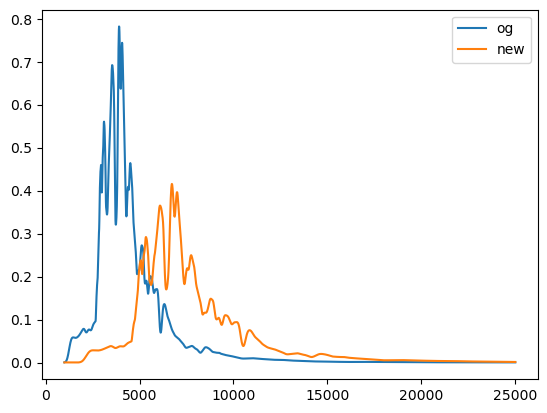

In [232]:
plt.plot(wavelength, sp_norm(wavelength, flux_unit=units.FLAM), label='og')
plt.plot(res_red[-1], res_red[1], label='new')
plt.legend()        

In [223]:
obs_trial = Observation(res_red[2], v_band)
obs_trial_before = Observation(sp_norm, v_band)
# obs_trial.plot(left=1, right=15000, flux_unit='flam',
#             title='Normed Blackbody with Extinction through V Filter AFTER')

# obs_trial_before.plot(left=1, right=15000, flux_unit='flam',
#             title='Normed Blackbody with Extinction through V Filter BEFORE EXT & RED')

In [224]:
sp_stim_before = obs_trial_before.effstim(flux_unit='vegamag', vegaspec=vega)
sp_stim = obs_trial.effstim(flux_unit='vegamag', vegaspec=vega)

print('before dust, V =', np.round(sp_stim_before,1))
print('after dust, V =', np.round(sp_stim,1))    # MAKES NO SENSE BC AFTER DUST IS BRIGHTER???

before dust, V = -19.3 mag(VEGA)
after dust, V = -19.6 mag(VEGA)


In [ ]:
sp_stim_before = sp_obs_before.effstim(flux_unit='vegamag', vegaspec=vega)
sp_stim = sp_obs.effstim(flux_unit='vegamag', vegaspec=vega)
print('before dust, V =', np.round(sp_stim_before,1))
print('after dust, V =', np.round(sp_stim,1))

# Calculate extinction and compare to our chosen value.
Av_calc = sp_stim - sp_stim_before
print('$A_V$ = ', np.round(Av_calc,1))

#### Get filters from DES

In [97]:
import wget

file_paths = ['des_g.txt', 'des_i.txt', 'des_r.txt', 'des_z.txt', 'des_Y.txt']
base = 'https://noirlab.edu/science/sites/default/files/media/archives/documents/'
urls = ['scidoc1737.txt', 'scidoc1735.txt', 'scidoc1736.txt', 'scidoc1734.txt', 'scidoc1738.txt']

for i in range(len(file_paths)): 
    wget.download(base + urls[i], file_paths[i])
print('done')

# ## g
# url = 'https://noirlab.edu/science/sites/default/files/media/archives/documents/scidoc1737.txt'
# file_path = 'des_g.txt'
# wget.download(url, file_path)
# print('downloaded')

# ## i
# url = 'https://noirlab.edu/science/sites/default/files/media/archives/documents/scidoc1735.txt'
# file_path = 

# ## r
# https://noirlab.edu/science/sites/default/files/media/archives/documents/scidoc1736.txt

# ## z
# https://noirlab.edu/science/sites/default/files/media/archives/documents/scidoc1734.txt

# ## Y
# https://noirlab.edu/science/sites/default/files/media/archives/documents/scidoc1738.txt


done


In [100]:
def make_filter(des_file): 
    """inputs: des.txt file name
    outputs: des_wvl, des_tpt, des_model (Empirical1D), des_filter (SpectralElement)
    """
    des = np.loadtxt(des_file)

    des_wvl = des[:, 0]  # Wavelength in Angstroms
    des_tpt = des[:, 1]  # throughput

    des_model = Empirical1D(points=des_wvl, lookup_table=des_tpt)
    des_filter = SpectralElement(des_model, wave_unit='angstrom')

    return des_wvl, des_tpt, des_model, des_filter

In [101]:
des_g_model = make_filter(file_paths[0])[2]
des_g_filter = make_filter(file_paths[0])[3]

des_i_model = make_filter(file_paths[1])[2]
des_i_filter = make_filter(file_paths[1])[3]

des_r_model = make_filter(file_paths[2])[2]
des_r_filter = make_filter(file_paths[2])[3]

des_z_model = make_filter(file_paths[3])[2]
des_z_filter = make_filter(file_paths[3])[3]

des_Y_model = make_filter(file_paths[4])[2]
des_Y_filter = make_filter(file_paths[4])[3]

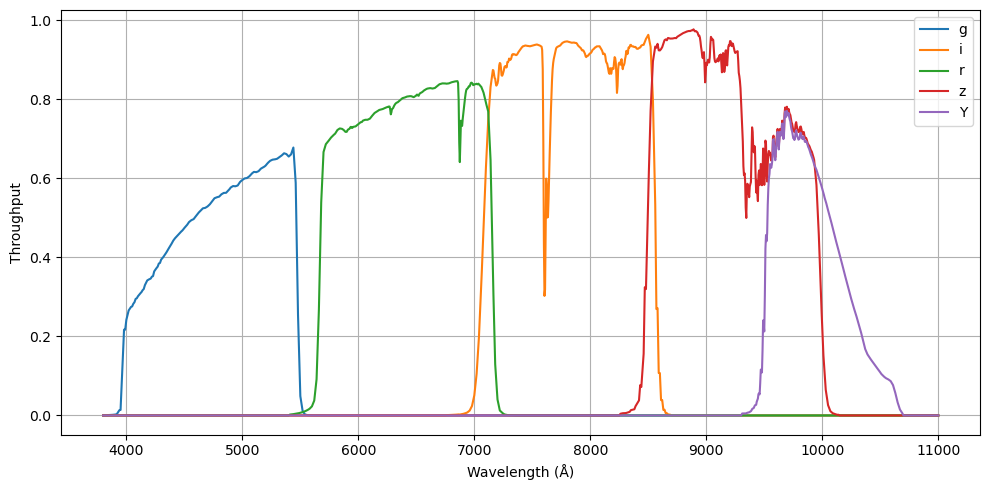

In [107]:
ns = ['g', 'i', 'r', 'z', 'Y']

plt.figure(figsize=(10, 5))

for i, file in enumerate(file_paths): 
    des_wvl = make_filter(file)[0]
    des_tpt = make_filter(file)[1]

    plt.plot(des_wvl, des_tpt, label=f'{ns[i]}')
# plt.plot(des_wvl, v_band(des_wvl), label='Johnson V')

plt.xlabel('Wavelength (Å)')
plt.ylabel('Throughput')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
des_filters = [des_g_filter, des_i_filter, des_r_filter, des_z_filter, des_Y_filter]


def calc_mag(des_filter, sp_og, sp_loc, sp_suc): 
    """inputs: des_filter, sp_og (original spectrum), sp_loc (host dust only), sp_suc (successive) 
    outputs: mags (og, loc, suc)
    """
    obs_trial_before = Observation(sp_og, des_filter)      # sp_norm
    obs_trial_loc = Observation(sp_loc, des_filter)        # res_z[2]
    obs_trial_suc = Observation(sp_suc, des_filter)        # res_red[2]

    sp_stim_before = obs_trial_before.effstim(flux_unit='vegamag', vegaspec=vega)
    sp_stim_loc = obs_trial_loc.effstim(flux_unit='vegamag', vegaspec=vega)
    sp_stim_suc = obs_trial_suc.effstim(flux_unit='vegamag', vegaspec=vega)


    return sp_stim_before, sp_stim_loc, sp_stim_suc, obs_trial_loc.effective_wavelength()

In [21]:
# sp_norm, wavelength defined initially
# this is just for time point day = -1 
res_z = local(sp_norm, wavelength, z=0.6, Av=0.05, Rv=3.1)

zs = [0.6, 0.3, 0.12] 
Avs = [0.05, 0.02, 0.002]
Rv = 3.1
res_red = successive(sp_norm, wavelength, zs=zs, Avs=Avs, Rv=Rv)     

In [22]:
all_mags_og = np.zeros(len(des_filters))
all_mags_loc = np.zeros(len(des_filters))
all_mags_suc = np.zeros(len(des_filters))
eff_wvls_loc = np.zeros(len(des_filters))

for i, des_filter in enumerate(des_filters): 
    mags = calc_mag(des_filter, sp_norm, res_z[2], res_red[2])
    all_mags_og[i] = mags[0].value
    all_mags_loc[i] = mags[1].value
    all_mags_suc[i] = mags[2].value
    eff_wvls_loc[i] = mags[3].value 
    

In [75]:
## g band
obs_trial_loc = Observation(res_z[2], des_g_filter)
obs_trial_suc = Observation(res_red[2], des_g_filter)
obs_trial_before = Observation(sp_norm, des_g_filter)

sp_stim_before = obs_trial_before.effstim(flux_unit='vegamag', vegaspec=vega)    # vega system 
sp_stim_loc = obs_trial_loc.effstim(flux_unit='vegamag', vegaspec=vega)
sp_stim_suc = obs_trial_suc.effstim(flux_unit='vegamag', vegaspec=vega)

print('before dust, V =', np.round(sp_stim_before,1))
print('after LOCAL dust, V =', np.round(sp_stim_loc,1))
print('after SUCCESSIVE dust, V =', np.round(sp_stim_suc,1)) 

before dust, V = -19.4 mag(VEGA)
after LOCAL dust, V = -19.0 mag(VEGA)
after SUCCESSIVE dust, V = -18.7 mag(VEGA)


In [76]:
## v band
obs_v_loc = Observation(res_z[2], v_band)
obs_v_suc = Observation(res_red[2], v_band)
obs_v_before = Observation(sp_norm, v_band)

sp_v_before = obs_v_before.effstim(flux_unit='vegamag', vegaspec=vega)    # vega system 
sp_v_loc = obs_v_loc.effstim(flux_unit='vegamag', vegaspec=vega)
sp_v_suc = obs_v_suc.effstim(flux_unit='vegamag', vegaspec=vega)

print('before dust, V =', np.round(sp_v_before,1))
print('after LOCAL dust, V =', np.round(sp_v_loc,1))
print('after SUCCESSIVE dust, V =', np.round(sp_v_suc,1)) 

before dust, V = -19.3 mag(VEGA)
after LOCAL dust, V = -19.8 mag(VEGA)
after SUCCESSIVE dust, V = -19.6 mag(VEGA)


In [77]:
## compare to v band: (maybe more worth it to compare to g or r band?) 
Av_calc_loc = sp_v_loc.value - sp_v_before.value
Av_calc_suc = sp_v_suc.value - sp_v_before.value

color_diff_loc = all_mags_loc - all_mags_og 
color_diff_suc = all_mags_suc - all_mags_og 

color_excess_loc = color_diff_loc - Av_calc_loc
color_excess_suc = color_diff_suc - Av_calc_suc

In [78]:
color_excess_loc, color_excess_suc

(array([ 0.85962468, -1.21223443, -0.73505858, -1.05774443, -1.20256789]),
 array([ 0.99334007, -1.56498593, -0.91284485, -1.43393295, -1.74050031]))

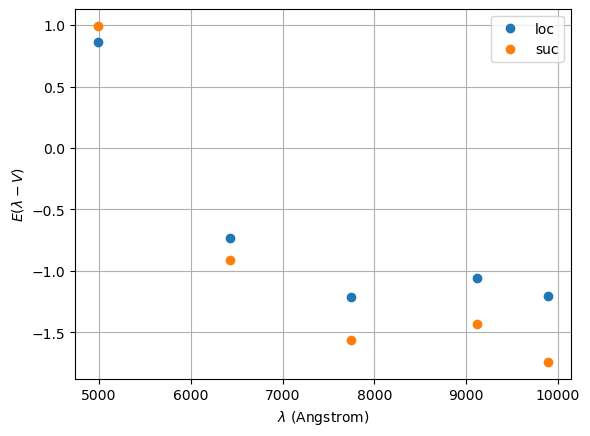

In [79]:
plt.plot(eff_wvls_loc, color_excess_loc, 'o', label='loc')
plt.plot(eff_wvls_loc, color_excess_suc, 'o', label='suc')
plt.xlabel(f'$\lambda$ (Angstrom)')
plt.ylabel(f'$E(\lambda - V)$')
plt.grid()
plt.legend()

In [80]:
Av_calc_loc, Av_calc_suc

(-0.4700902977132948, -0.28468643515885006)

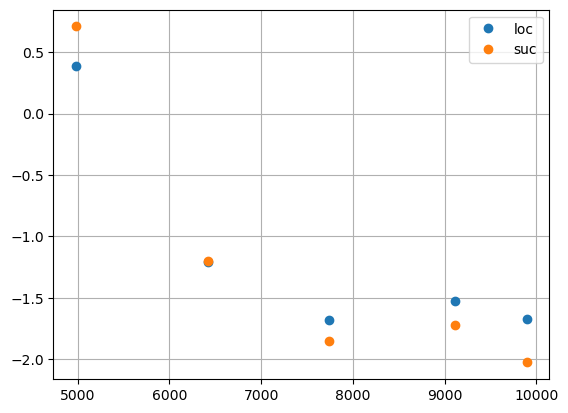

In [81]:
plt.plot(eff_wvls_loc, color_diff_loc, 'o', label='loc')
plt.plot(eff_wvls_loc, color_diff_suc, 'o', label='suc')
plt.grid()
plt.legend()

## STEP 4: LIGHT CURVES

#### For every time point for every filter: Get magnitudes! 

In [23]:
def make_sp_norm_model(day, plot=True): 
    cond = snflux_1a['day'] == day
    wavelength = snflux_1a['wvl'][cond].values
    flux = snflux_1a['flux'][cond].values
    
    # source spectrum normalized to -19.3 
    model = Empirical1D(points=wavelength, lookup_table=flux)
    sp = SourceSpectrum(model, wave_unit='angstrom', flux_unit=units.FLAM)
    
    vega = SourceSpectrum.from_vega()
    vmag = -19.3
    
    v_band = SpectralElement.from_filter('johnson_v')                     # maybe here? but this is just a normalization factor..
    sp_norm = sp.normalize(vmag * units.VEGAMAG, v_band, vegaspec=vega)

    if plot == True: 
        sp_norm.plot(left=10, right=25000, flux_unit='flam', title=f'normed sn ia for day {day}')

    return sp_norm, wavelength

<Quantity [5.56501370e-13, 6.37105672e-13, 6.87867869e-13, ...,
           2.41889269e-11, 2.41889269e-11, 2.41875499e-11] FLAM>

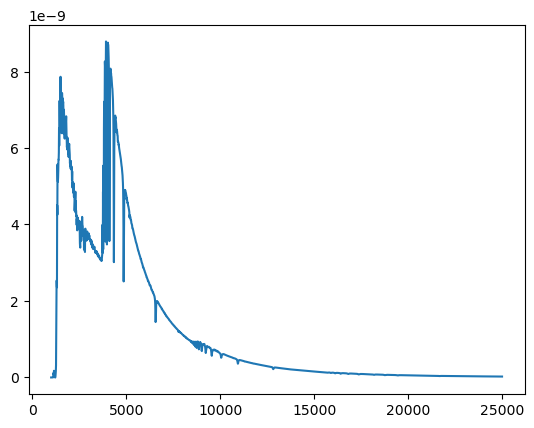

In [172]:
plt.plot(wavelength, SourceSpectrum.from_vega()(wavelength, flux_unit=units.FLAM))
SourceSpectrum.from_vega()(wavelength, flux_unit=units.FLAM)

In [200]:
vega = SourceSpectrum.from_vega()
# vega(wavelength)
# des_filters

vega_des = Observation(vega, des_filters[0])      # g band 
vega_mag = vega_des.effstim(flux_unit='vegamag', vegaspec=vega)    # should be 0, yes it is! 
vega_mag 


<Magnitude 0. mag(VEGA)>

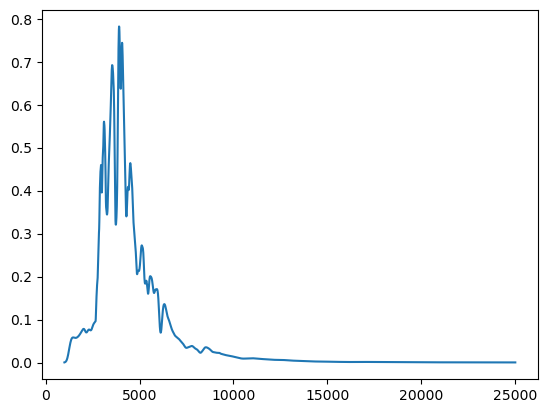

In [171]:
plt.plot(wavelength, sp_norms[19](wavelength, flux_unit=units.FLAM))

In [213]:
## try to use effstim but with vega obs
## g band: 
all_days = snflux_1a['day'].unique().astype(int)

mags_1filt_og = np.zeros(len(all_days))
f = 4

for i, d in enumerate(all_days): 

    vega_des = Observation(vega, des_filters[f])
    vega_flux = vega_des.effstim(flux_unit=units.FLAM)
    sn_des = Observation(sp_norms[d], des_filters[f])
    sn_flux = sn_des.effstim(flux_unit=units.FLAM)

    mag = -2.5 * np.log10(sn_flux / vega_flux)
    mags_1filt_og[i] = mag


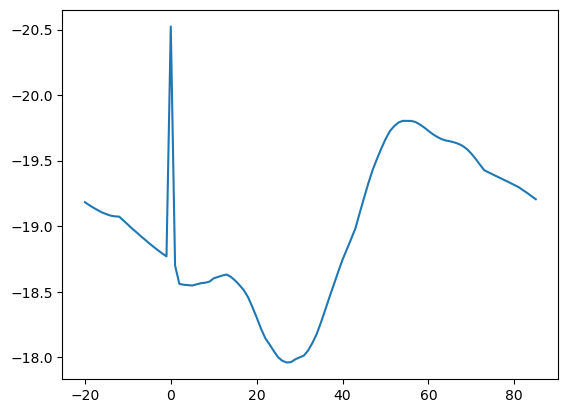

In [214]:
## this is so wrong?!?!?!? !
plt.plot(all_days, mags_1filt_og)
plt.gca().invert_yaxis()

In [191]:
## test to integrate by myself w scipy 

all_days = snflux_1a['day'].unique().astype(int)

mags_1filt_og = np.zeros(len(all_days))
for i, d in enumerate(all_days): 
    a = sp_norms[d].integrate(flux_unit=units.FLAM)
    b = SourceSpectrum.from_vega().integrate(flux_unit=units.FLAM)
    
    mag = -2.5 * np.log10(a/b)
    mags_1filt_og[i] = mag

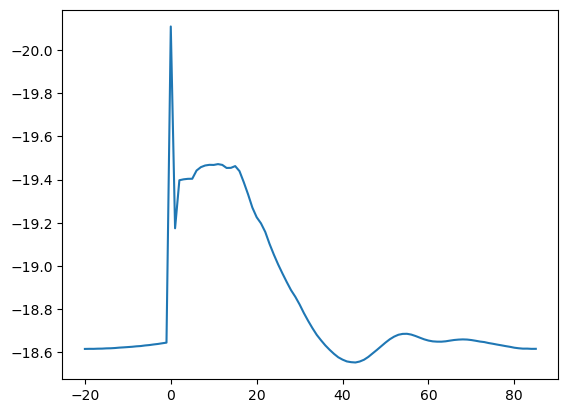

In [194]:
## this is wrong too lol 
plt.plot(all_days, mags_1filt_og)
plt.gca().invert_yaxis()

In [ ]:
from astropy import units as u
from synphot import SourceSpectrum, units, conf
from synphot.models import GaussianFlux1D
sp = SourceSpectrum(GaussianFlux1D, mean=6000*u.AA, fwhm=10*u.AA,
                    total_flux=1*(u.erg/(u.cm**2 * u.s)))
sp.integrate()
<Quantity 3.02046758e+11 ph / (s cm2)>
with conf.set_temp('default_integrator', 'analytical'):
    print(f'{repr(sp.integrate())}')
<Quantity 3.02046994e+11 ph / (s cm2)>
sp.integrate(integration_type='analytical')
<Quantity 3.02046994e+11 ph / (s cm2)>
sp.integrate(flux_unit=units.FLAM)
<Quantity 0.99999972 erg / (s cm2)>
sp.integrate(flux_unit=units.FLAM, integration_type='analytical')
<Quantity 1. erg / (s cm2)>

In [33]:
all_days = snflux_1a['day'].unique()
sp_norms = [make_sp_norm_model(all_days[i], plot=False)[0] for i in range(len(all_days))]
wavelength = make_sp_norm_model(all_days[0], plot=False)[1]    # same for all days

res_zs = [local(sp_norm, wavelength, z=0.6, Av=0.05, Rv=3.1) for sp_norm in sp_norms]
sp_res_zs = [res_zs[i][2] for i in range(len(sp_norms))]
res_reds = [successive(sp_norm, wavelength, 
                       zs=[0.6, 0.3, 0.12], 
                       Avs=[0.05, 0.02, 0.002], 
                       Rv=3.1) for sp_norm in sp_norms]
sp_res_reds = [res_reds[i][2] for i in range(len(sp_norms))]

In [31]:
vega_des = Observation(vega, des_filters[4])
vega_mag = vega_des.effstim(flux_unit='flam', vegaspec=vega) 
vega_mag

<Quantity 6.50534334e-10 FLAM>

In [34]:
sp_og = sp_norms[0]
obs_trial_before = Observation(sp_og, des_filters[4])
sp_stim_before = obs_trial_before.effstim(flux_unit='flam', vegaspec=vega)
sp_stim_before

<Quantity 0.10535741 FLAM>

In [35]:
-2.5 * np.log10(sp_stim_before / vega_mag)

<Quantity -20.52348719>

In [36]:
sp_stim_before_mag = obs_trial_before.effstim(flux_unit='vegamag', vegaspec=vega)
sp_stim_before_mag

<Magnitude -20.52348719 mag(VEGA)>

In [46]:
## try manually integrating each, vega and obs
obs_trial_before.waveset, obs_trial_before.binflux
obs_trial_before.bandpass

In [75]:
## F_obs = integral (f_lam(lam) T(lam) dlam ) / integral (T(lam) dlam )
import scipy

wavelength = wavelength                               # in Ångström
flux_obs = sp_og(wavelength, flux_unit=units.FLAM)        # in erg/s/cm^2/Å = flam 
flux_vega = vega(wavelength, flux_unit=units.FLAM)        # in erg/s/cm^2/Å = flam 
transmission = des_filters[4](wavelength)             # dimensionless (0–1)

numerator_obs = scipy.integrate.cumtrapz(flux_obs * transmission, wavelength)[-1]
numerator_vega = scipy.integrate.cumtrapz(flux_vega * transmission, wavelength)[-1]
denominator = scipy.integrate.cumtrapz(transmission, wavelength)[-1]

flux_band_obs = numerator_obs / denominator                   # still in erg/s/cm^2/Å
flux_band_vega = numerator_vega / denominator
flux_band_obs, flux_band_vega

-2.5 * np.log10(flux_band_obs / flux_band_vega)

-20.522057764138314

In [76]:
all_days = snflux_1a['day'].unique().astype(int)

mags_filt_og = np.zeros(len(all_days))
f = 4

for i, d in enumerate(all_days): 

    wavelength = wavelength                               # in Ångström
    flux_obs = sp_norms[d](wavelength, flux_unit=units.FLAM)        # in erg/s/cm^2/Å = flam 
    flux_vega = vega(wavelength, flux_unit=units.FLAM)        # in erg/s/cm^2/Å = flam 
    transmission = des_filters[f](wavelength)             # dimensionless (0–1)
    
    numerator_obs = scipy.integrate.cumtrapz(flux_obs * transmission, wavelength)[-1]
    numerator_vega = scipy.integrate.cumtrapz(flux_vega * transmission, wavelength)[-1]
    denominator = scipy.integrate.cumtrapz(transmission, wavelength)[-1]
    
    flux_band_obs = numerator_obs / denominator                   # still in erg/s/cm^2/Å
    flux_band_vega = numerator_vega / denominator
    flux_band_obs, flux_band_vega
    
    mags_filt_og[i] = -2.5 * np.log10(flux_band_obs / flux_band_vega)

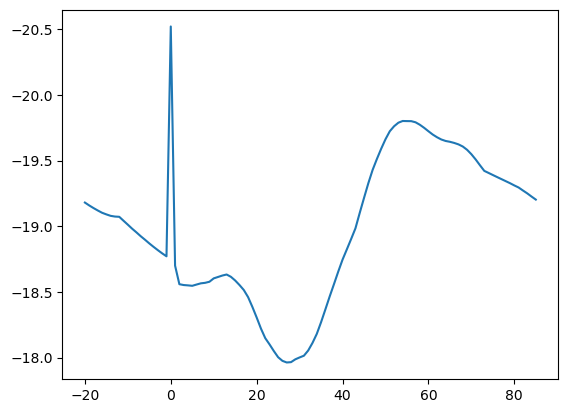

In [77]:
plt.plot(all_days, mags_filt_og)
plt.gca().invert_yaxis()

In [81]:
all_days = snflux_1a['day'].unique().astype(int)

mags_filt_og = np.zeros(len(all_days))
f = 4

for i, d in enumerate(all_days): 
    obs_trial_before = Observation(sp_norms[d], des_filters[f])      # sp_norm
    sp_stim_before = obs_trial_before.effstim(flux_unit='vegamag', vegaspec=vega).value

    mags_filt_og[i] = sp_stim_before

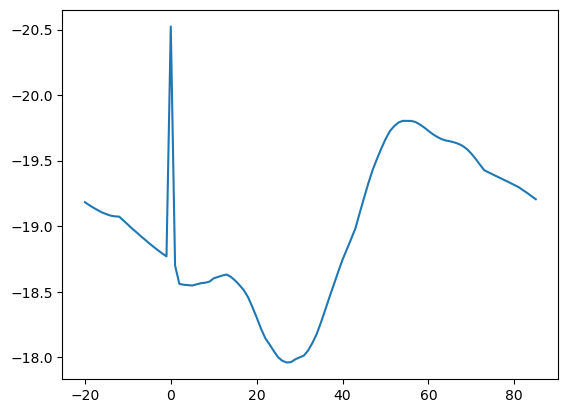

In [82]:
plt.plot(all_days, mags_filt_og)
plt.gca().invert_yaxis()

In [83]:
def calc_mag(des_filter, sp_og, sp_loc, sp_suc): 
    """inputs: des_filter, sp_og (original spectrum), sp_loc (host dust only), sp_suc (successive) 
    outputs: mags (og, loc, suc)
    """
    obs_trial_before = Observation(sp_og, des_filter)      # sp_norm
    obs_trial_loc = Observation(sp_loc, des_filter)        # res_z[2]
    obs_trial_suc = Observation(sp_suc, des_filter)        # res_red[2]


    vega_des = Observation(vega, des_filter)                # vega from source spectrum as observed through des filer
    vega_mag = vega_des.effstim(flux_unit='vegamag', vegaspec=vega) 

    ## same if i try with -2.5 * np.log10(F_obs / F_vega) 
    sp_stim_before = obs_trial_before.effstim(flux_unit='vegamag', vegaspec=vega)
    # sp_stim_before = obs_trial_before.effstim(flux_unit='flam', vegaspec=vega)
    sp_stim_loc = obs_trial_loc.effstim(flux_unit='vegamag', vegaspec=vega)
    sp_stim_suc = obs_trial_suc.effstim(flux_unit='vegamag', vegaspec=vega)


    return sp_stim_before, sp_stim_loc, sp_stim_suc, obs_trial_loc.effective_wavelength()

In [85]:
def get_all_mags(sp_norm, sp_res_z, sp_res_red): 

    all_mags_og = np.zeros(len(des_filters))
    all_mags_loc = np.zeros(len(des_filters))
    all_mags_suc = np.zeros(len(des_filters))
    eff_wvls_loc = np.zeros(len(des_filters))
    
    for i, des_filter in enumerate(des_filters): 
        mags = calc_mag(des_filter, sp_norm, sp_res_z, sp_res_red)     
        all_mags_og[i] = mags[0].value
        all_mags_loc[i] = mags[1].value
        all_mags_suc[i] = mags[2].value
        eff_wvls_loc[i] = mags[3].value 

    return all_mags_og, all_mags_loc, all_mags_suc, eff_wvls_loc

In [86]:
# g_mags = np.zeros(len(sp_norms))
# i_mags = np.zeros(len(sp_norms))
# r_mags = np.zeros(len(sp_norms))
# z_mags = np.zeros(len(sp_norms))
# Y_mags = np.zeros(len(sp_norms))

all_days_mags_og = np.zeros((len(sp_norms), len(des_filters)))
all_days_mags_loc = np.zeros((len(sp_norms), len(des_filters)))
all_days_mags_suc = np.zeros((len(sp_norms), len(des_filters)))
all_eff_wvls_loc = np.zeros((len(sp_norms), len(des_filters)))

## across time now 
for i, day in enumerate(all_days): 
    mags_wvls = get_all_mags(sp_norms[i], sp_res_zs[i], sp_res_reds[i])
    all_days_mags_og[i] = mags_wvls[0]
    all_days_mags_loc[i] = mags_wvls[1]
    all_days_mags_suc[i] = mags_wvls[2]
    all_eff_wvls_loc[i] = mags_wvls[3]


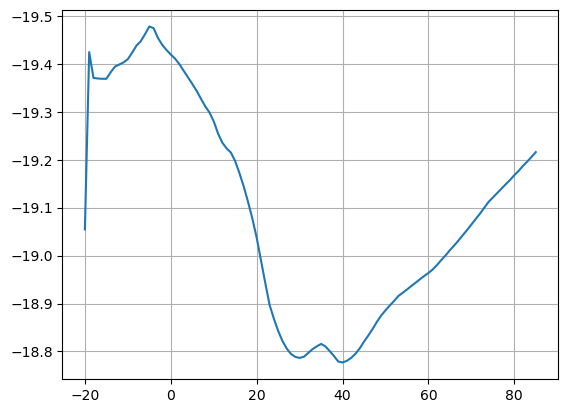

In [154]:
# mags in vega, original. 
plt.plot(all_days, all_days_mags_og[:,0])
plt.gca().invert_yaxis()
plt.grid()


In [ ]:
plt.plot(all_days, all_days_mags_og[:,0])
plt.gca().invert_yaxis()
plt.grid()


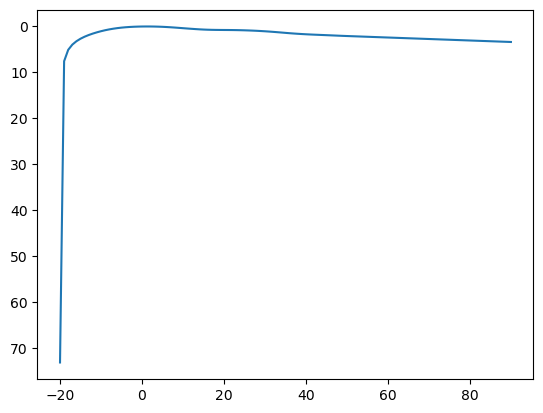

In [144]:
plt.plot(lc_template[';epoch'], lc_template['R'])
plt.gca().invert_yaxis()

In [ ]:
obs_trial_before = Observation(sp_og, des_filter)      # sp_norm
obs_trial_loc = Observation(sp_loc, des_filter)        # res_z[2]
obs_trial_suc = Observation(sp_suc, des_filter)        # res_red[2]

sp_stim_before = obs_trial_before.effstim(flux_unit='vegamag', vegaspec=vega)
# sp_stim_before = obs_trial_before.effstim(flux_unit='flam', vegaspec=vega)
sp_stim_loc = obs_trial_loc.effstim(flux_unit='vegamag', vegaspec=vega)
sp_stim_suc = obs_trial_suc.effstim(flux_unit='vegamag', vegaspec=vega)


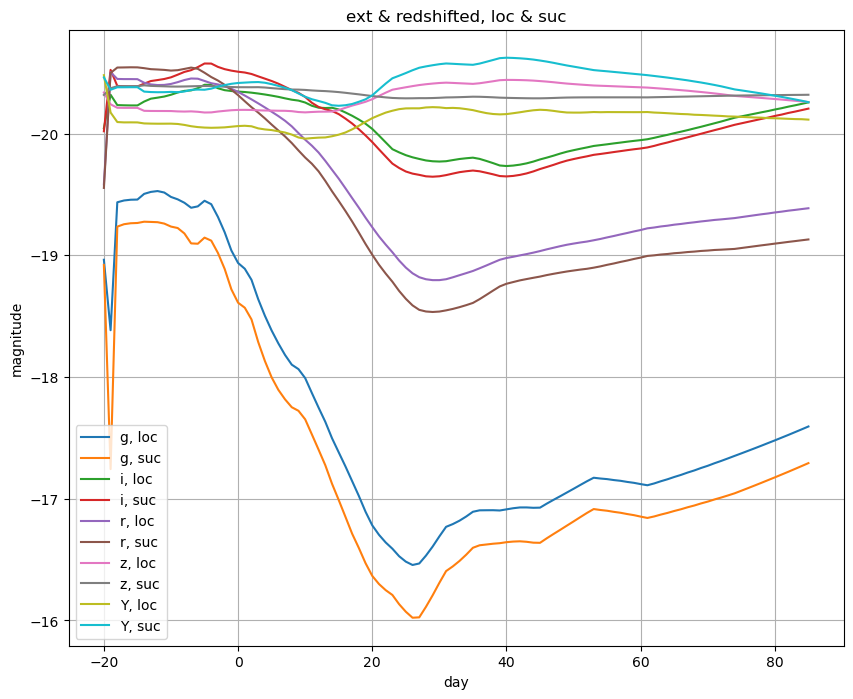

In [88]:
filt_names = ['g', 'i', 'r', 'z', 'Y']

plt.figure(figsize=(10, 8))
for i, filt in enumerate(filt_names): 
    plt.plot(all_days, all_days_mags_loc[:, i], label=f'{filt}, loc')
    plt.plot(all_days, all_days_mags_suc[:, i], label=f'{filt}, suc')
    plt.xlabel('day')
    plt.ylabel('magnitude')
    plt.gca().invert_yaxis()
    plt.title('ext & redshifted, loc & suc')
    plt.legend()
    plt.grid()

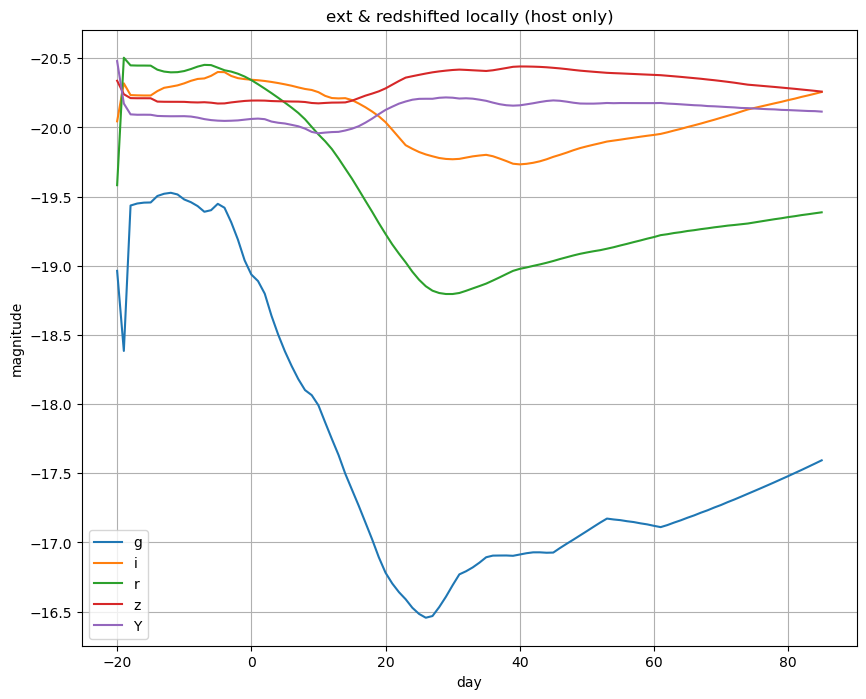

In [89]:
filt_names = ['g', 'i', 'r', 'z', 'Y']

plt.figure(figsize=(10, 8))
for i, filt in enumerate(filt_names): 
    plt.plot(all_days, all_days_mags_loc[:, i], label=f'{filt}')
    plt.xlabel('day')
    plt.ylabel('magnitude')
    plt.gca().invert_yaxis()
    plt.title('ext & redshifted locally (host only)')
    plt.legend()
    plt.grid()

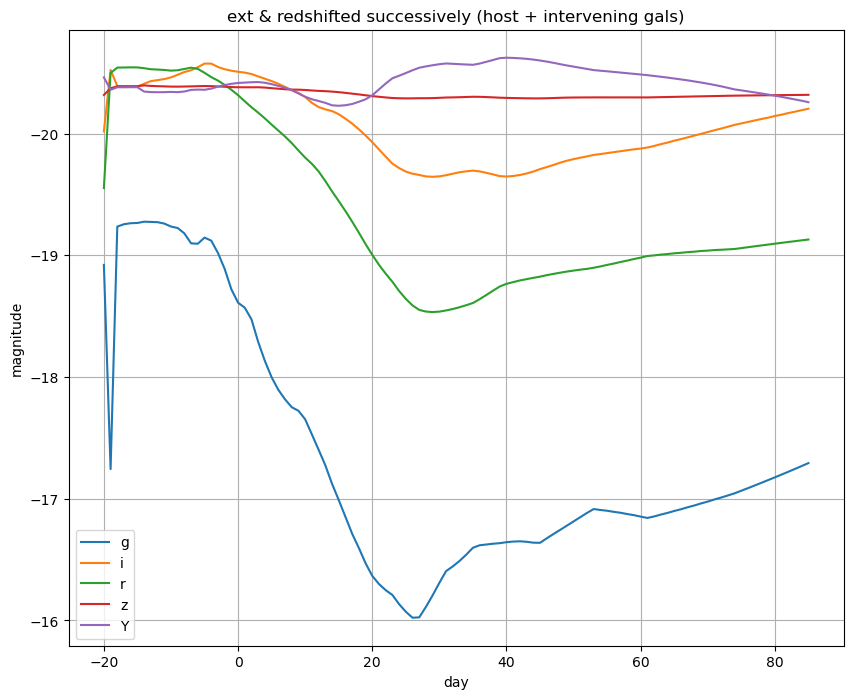

In [455]:
filt_names = ['g', 'i', 'r', 'z', 'Y']

plt.figure(figsize=(10, 8))
for i, filt in enumerate(filt_names): 
    plt.plot(all_days, all_days_mags_suc[:, i], label=f'{filt}')
    plt.xlabel('day')
    plt.ylabel('magnitude')
    plt.gca().invert_yaxis()
    plt.title('ext & redshifted successively (host + intervening gals)')
    plt.legend()
    plt.grid()

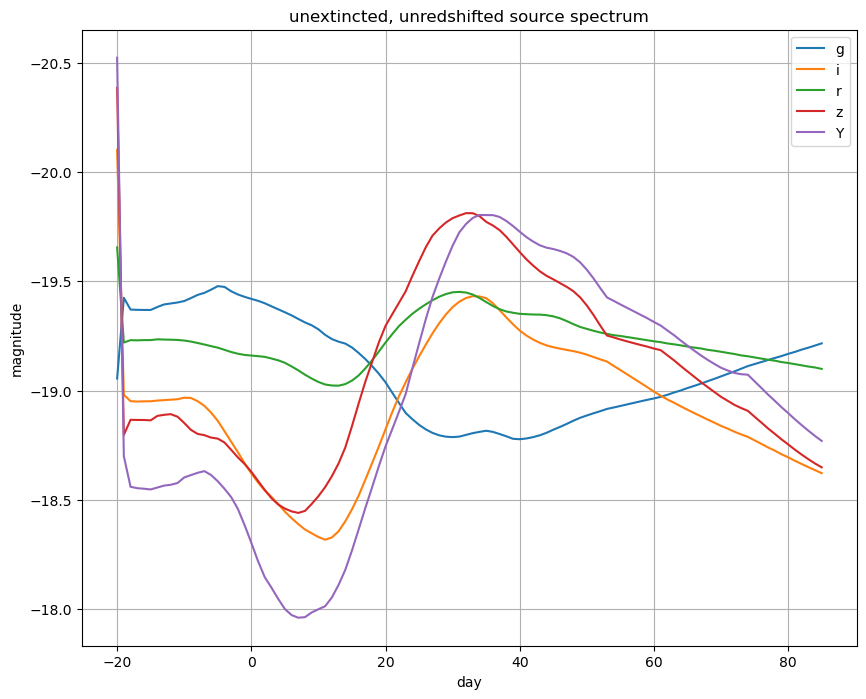

In [90]:
filt_names = ['g', 'i', 'r', 'z', 'Y']

plt.figure(figsize=(10, 8))
for i, filt in enumerate(filt_names): 
    plt.plot(all_days, all_days_mags_og[:, i], label=f'{filt}')
    plt.xlabel('day')
    plt.ylabel('magnitude')
    plt.gca().invert_yaxis()
    plt.title('unextincted, unredshifted source spectrum')
    plt.legend()
    plt.grid()
    

In [473]:
test_lcs = [Observation(sp_norms[i], des_g_filter).effstim(flux_unit='vegamag', vegaspec=vega).value for i in range(len(all_days))]

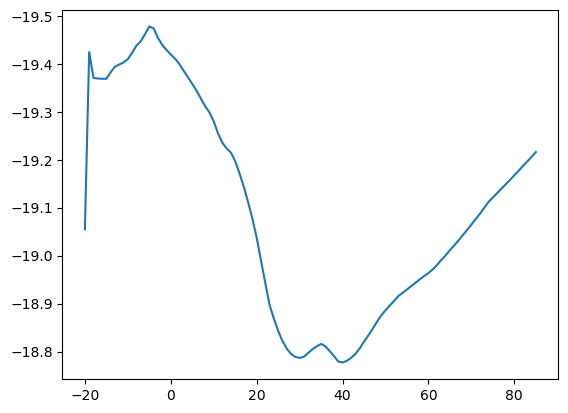

In [476]:
plt.plot(all_days, test_lcs)
plt.gca().invert_yaxis()

In [ ]:
obs.effstim('vegamag')
print(f"Vega magnitude: {magnitude_vegamag}")

# Calculate the AB magnitude
magnitude_abmag = obs.effstim('abmag')
print(f"AB magnitude: {magnitude_abmag}")

# Calculate the ST magnitude
magnitude_stmag = obs.effstim('stmag')
print(f"ST magnitude: {magnitude_stmag}")


### a) Light curve check

In [89]:
lc_template = pd.read_csv('lc_template.dat', delim_whitespace=True)
lc_template

,;epoch,U,B,V,R,I,Y,J,H,K
0,-20.0,73.7467,74.2374,73.6345,73.0829,72.3734,71.5946,70.9369,69.9150,68.8001
1,-19.0,6.8970,7.6110,7.6800,7.6080,7.6200,7.6457,7.6821,7.6731,7.5824
2,-18.0,4.4250,5.1390,5.2080,5.1360,5.1470,5.1734,5.2028,5.2009,5.1077
3,-17.0,3.2980,4.0120,4.0810,4.0100,4.0210,4.0484,4.0690,4.0760,3.9795
4,-16.0,2.5600,3.2750,3.3440,3.2720,3.2830,3.3114,3.3220,3.3392,3.2391
...,...,...,...,...,...,...,...,...,...,...
106,86.0,4.0230,3.7480,3.2690,3.3030,3.6770,3.4040,4.8167,3.2543,3.4668
107,87.0,4.0410,3.7630,3.2950,3.3360,3.7240,3.4624,4.8727,3.3081,3.5228
108,88.0,4.0600,3.7790,3.3220,3.3680,3.7700,3.5182,4.9266,3.3600,3.5766
109,89.0,4.0780,3.7940,3.3480,3.4000,3.8170,3.5732,4.9800,3.4117,3.6300


In [437]:
filts = ['U', 'B', 'V', 'R', 'I', 'Y', 'J', 'H', 'K']

In [438]:
for i,f in enumerate(filts): 
    print(f, lc_template[f].min())

U -0.49
B 0.0
V 0.048
R 0.063
I 0.304
Y 0.3764
J 0.2225
H 0.3345
K 0.1676


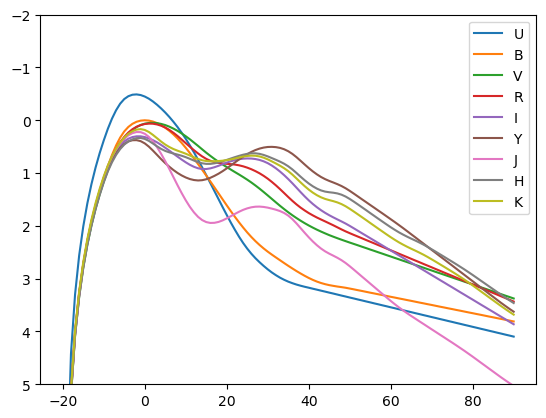

In [440]:
for i,f in enumerate(filts): 
    # plt.figure(i)
    plt.plot(lc_template[';epoch'], lc_template[f], label=f'{f}')
    # plt.title(f'{f}')
    plt.gca().invert_yaxis()
    plt.ylim([5, -2])
    plt.legend()

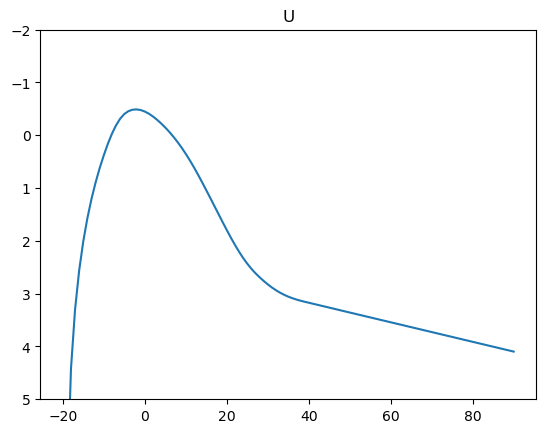

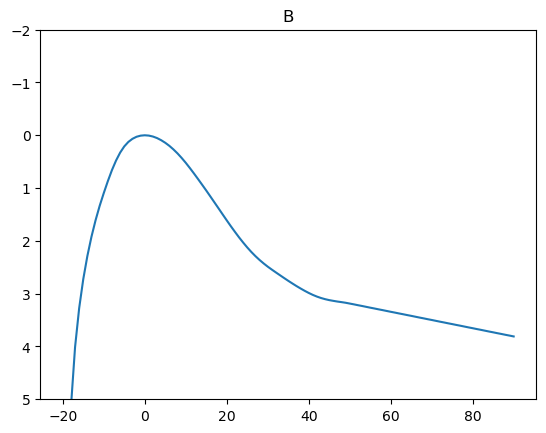

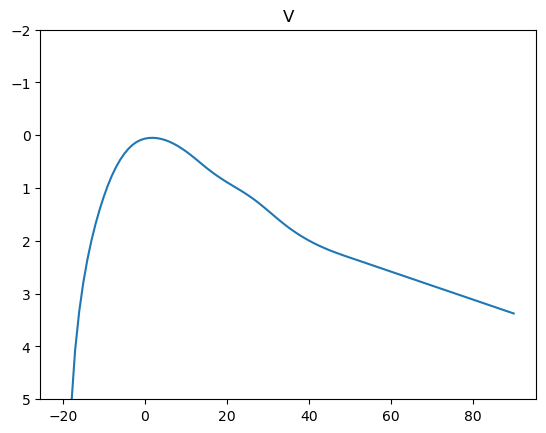

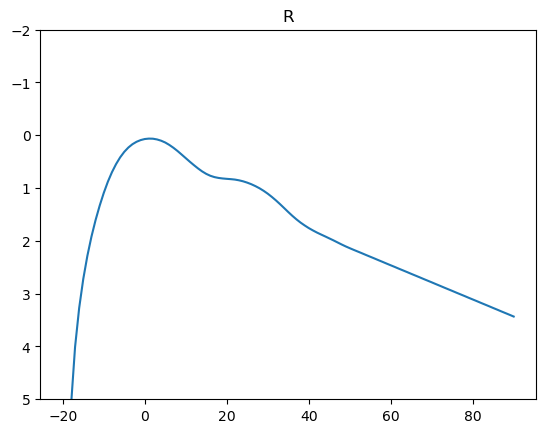

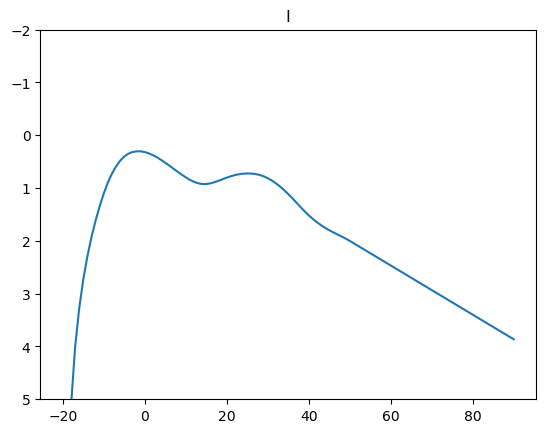

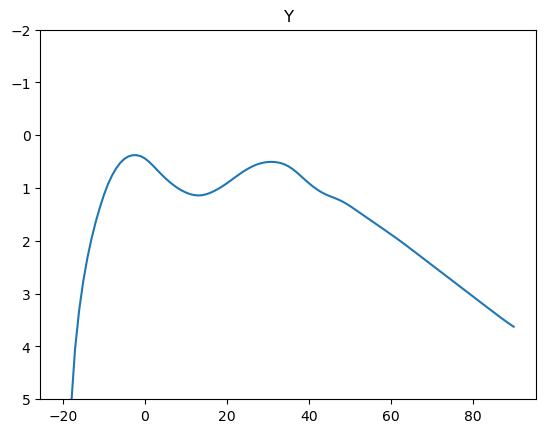

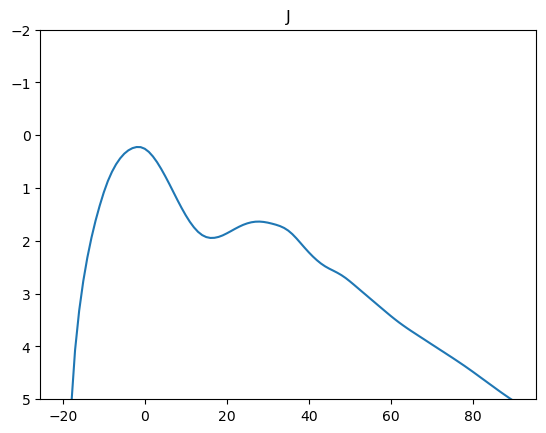

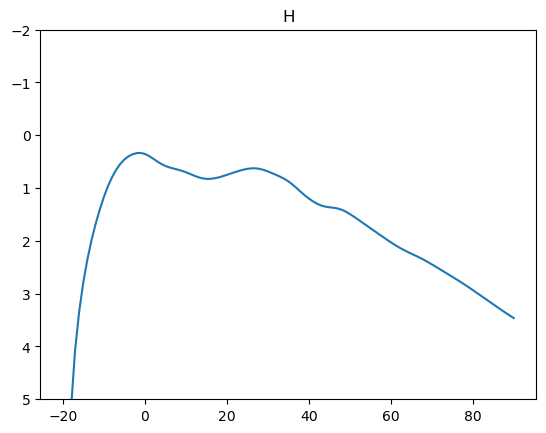

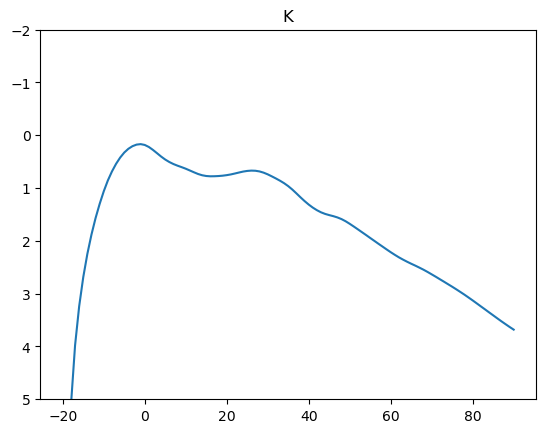

In [117]:
for i,f in enumerate(filts): 
    plt.figure(i)
    plt.plot(lc_template[';epoch'], lc_template[f], label=f'{f}')
    plt.title(f'{f}')
    plt.gca().invert_yaxis()
    plt.ylim([5, -2])

### b) Re-doing flux manual calculations

In [ ]:
## get the spectrums from norm, loc, suc

## observe: convolve with the filter passbands
    ## i) here also try to do without convolving -> does light curve make sense for 1 mag over time? then do for multiple filters
    ## ii) all 5 filters convolving & mags

## manually integrate to get flux in each filter. 

In [121]:
all_days = snflux_1a['day'].unique()
sp_norms = [make_sp_norm_model(all_days[i], plot=False)[0] for i in range(len(all_days))]
wavelength = make_sp_norm_model(all_days[0], plot=False)[1]    # same for all days

res_zs = [local(sp_norm, wavelength, z=0.6, Av=0.05, Rv=3.1) for sp_norm in sp_norms]
sp_res_zs = [res_zs[i][2] for i in range(len(sp_norms))]
res_reds = [successive(sp_norm, wavelength, 
                       zs=[0.6, 0.3, 0.12], 
                       Avs=[0.05, 0.02, 0.002], 
                       Rv=3.1) for sp_norm in sp_norms]
sp_res_reds = [res_reds[i][2] for i in range(len(sp_norms))]

In [883]:
# as observed through v band, magnitude is -19.3 
# can use test_wvl for this (more densely sampled), try also des_wvl just to see

throughput = v_band(test_wvl.values)

vega_filter = vega(test_wvl.values, flux_unit=units.FLAM)
F_vega_v = np.trapz(throughput * vega_filter, test_wvl.values).value

test_wvl = snflux_1a['wvl'][snflux_1a['day'] == 0]     # make sure d = 0 
test_flux = snflux_1a['flux'][snflux_1a['day'] == 0]   
F_sn_v = np.trapz(test_flux * throughput, test_wvl.values)

mag_v = -19.3
A = (F_vega_v / F_sn_v) * 10**(mag_v / -2.5)    # normalization factor by which to multiply all sn_fluxes initally. 
A

54692352.905366234

#### i) Getting LCs for templates [turn this into function]

In [882]:
all_days = snflux_1a['day'].unique()

all_fluxes = np.zeros_like(all_days)
all_fluxes_filter = np.zeros_like(all_days)
all_mags = np.zeros_like(all_days)
all_mags_filter = np.zeros_like(all_days)

test_flux_vega = vega(test_wvl.values, flux_unit=units.FLAM)
test_flux_vega_int = np.trapz(test_flux_vega, test_wvl)

test_flux_vega_filter = vega(des_wvl, flux_unit=units.FLAM)
test_flux_vega_filter_int = np.trapz(test_flux_vega_filter, des_wvl)

f = 4
des = np.loadtxt(file_paths[f])    # des_g_model
des_wvl = des[:, 0]
des_tpt = des[:, 1]

# normalize all fluxes here based on one factor. 
normed_fluxes = A * snflux_1a['flux']

for i,d in enumerate(all_days): 
    # test_wvl = snflux_1a['wvl'][snflux_1a['day'] == d]
    # test_flux = snflux_1a['flux'][snflux_1a['day'] == d]   

    test_wvl = snflux_1a['wvl'][snflux_1a['day'] == d]
    test_flux = normed_fluxes[snflux_1a['day'] == d]   

    start_ind = np.where(test_wvl == des_wvl[0])[0][0]
    end_ind = np.where(test_wvl == des_wvl[-1])[0][0]
    overlap1 = test_wvl.values[start_ind:end_ind+1]
    overlap2 = des_wvl[::2] 

    overlap_wvl = overlap2
    overlap_flux = test_flux.values[start_ind:end_ind+1]
    transmission = des_tpt[::2]

    # integrate without des filter first. 
    # NOW WITH DES! 

    num = np.trapz(transmission * overlap_flux, overlap_wvl)
    denom = np.trapz(transmission, overlap_wvl)

    F_obs = num/denom

    vega_filter = vega(overlap_wvl, flux_unit=units.FLAM)             # same sampling as sn obs 
    num_vega = np.trapz(transmission * vega_filter, overlap_wvl)     
    denom_vega = np.trapz(transmission, overlap_wvl)
    F_vega = (num_vega/denom_vega).value

    # all_fluxes[i] = np.trapz(test_flux, test_wvl)
    ## all_fluxes_filter[i] = num/denom  # F_obs    ## more outdated don't use 
    # all_fluxes_filter[i] = num
    # all_mags[i] = -2.5 * np.log10(all_fluxes[i] / test_flux_vega_int.value)
    # all_mags_filter[i] = -2.5 * np.log10(all_fluxes_filter[i] / test_flux_vega_filter_int.value)   # oops i didn't not divide by filter transmission!??

    all_mags_filter[i] = -2.5 * np.log10(F_obs / F_vega)   # -19.27 for g band peak
    

(0.0, -25.0)

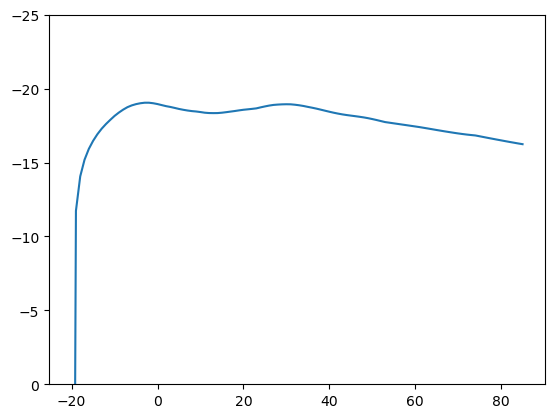

In [423]:
plt.plot(all_days, all_mags_filter)
plt.gca().invert_yaxis()
# plt.yscale('log')
plt.ylim([0, -25])

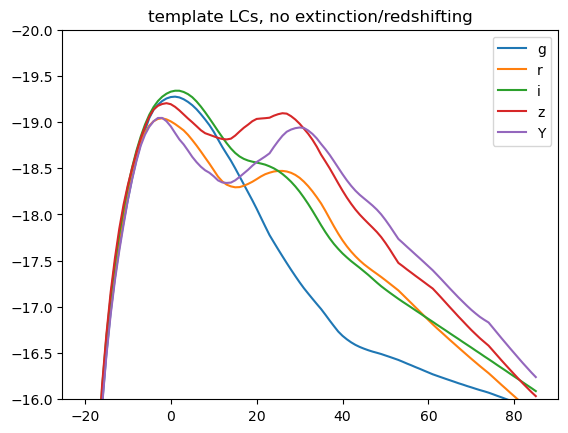

In [444]:
names = ['g', 'r', 'i', 'z', 'Y']
bands_des = [g_des, r_des, i_des, z_des, Y_des]

for i, band in enumerate(bands_des):
    plt.plot(all_days, band, label=f'{names[i]}')
    plt.gca().invert_yaxis()
    plt.ylim([-16, -20])
    plt.legend()
    plt.title('template LCs, no extinction/redshifting')


In [425]:
## check the mags in different bands first. it should be brightest in g band and progressively dimming.. but doesn't seem to be the case? 

g_des
r_des
i_des
z_des 
Y_des


array([ 52.40572213, -11.73273393, -14.06590299, -15.18655748,
       -15.92100854, -16.46775445, -16.91568607, -17.28945322,
       -17.60520877, -17.88619584, -18.15376759, -18.37951898,
       -18.57705871, -18.74457626, -18.86391807, -18.94960254,
       -19.00895363, -19.04436979, -19.04486266, -19.00930212,
       -18.9535775 , -18.8821016 , -18.81222442, -18.75818279,
       -18.69225403, -18.62356309, -18.56627212, -18.5171986 ,
       -18.4782074 , -18.45127317, -18.4132094 , -18.36895234,
       -18.34674543, -18.34139722, -18.34504596, -18.36959677,
       -18.40548445, -18.44482092, -18.48391184, -18.52776471,
       -18.5675937 , -18.59751538, -18.62819878, -18.66207224,
       -18.7307141 , -18.79382961, -18.85146463, -18.89548061,
       -18.91896559, -18.93415734, -18.94137629, -18.93643423,
       -18.9089867 , -18.87161114, -18.82331913, -18.7632514 ,
       -18.70691304, -18.64513264, -18.57625658, -18.50563008,
       -18.43565213, -18.36974016, -18.31034486, -18.25

In [ ]:
# rewrite local & successive redshifting / extinction. 
    ## run for all bands ultimately -> why is it not getting dimmer in other bands? 


#### ii) Extinction & Redshift 

In [65]:
## only thing to change is removing units in sp 
def extinct(sp_norm, wvl, Av, Rv=3.1): 
    """inputs: sp_norm, wavelength, Av, Rv
    outputs: wavelength, fluxes (photflam = arb units) from sp_ext, sp_ext, flux_ext (equivalent to fluxes) 
    """
    ext = CCM89(Rv=Rv)
    wvl = wavelength*u.Angstrom

    ex = ReddeningLaw(ext).extinction_curve(Av / ext.Rv, wavelengths=wvl)
    sp_ext = sp_norm*ex

    # equivalent
    flux_ext = apply(ccm89(wvl, Av, Rv), sp_norm(wvl)).value

    return wvl, sp_ext(wvl), sp_ext, flux_ext             # extract with sp_ext(wvl).value == flux_ext 


def redshift(spec, wvl, z, sp, option='sp'): 
    """inputs: fluxes (=spec), wavelength, z, sp, option='sp' or 'man'
    outputs: 
    - if sp: wvl_obs, fluxes from spz, spz, wvl
    - if man: wvl_obs, f_obs
    """
    if option == 'man':         # this is right
        wvl_obs = wvl * (1+z)        
        f_obs = spec / (1+z)
        return wvl_obs, f_obs 

    if option == 'sp': 
        wvl_obs = wvl * (1+z)
        spz = SourceSpectrum(sp.model, z, z_type='conserve_flux')
        return wvl_obs, spz(wvl), spz, wvl        


In [69]:
wvl_peak = snflux_1a['wvl'][snflux_1a['day'] == 0].values
test_flux_peak = normed_fluxes[snflux_1a['day'] == 0]
model = Empirical1D(points=wvl_peak, lookup_table=test_flux_peak)          # re initialize for every time point 
sp = SourceSpectrum(model, wave_unit='angstrom')

In [77]:
ext = CCM89(Rv=3.1)
wvl = wvl_peak*u.Angstrom
ex = ReddeningLaw(ext).extinction_curve(0.05 / ext.Rv, wavelengths=wvl)
sp_ext = sp*ex

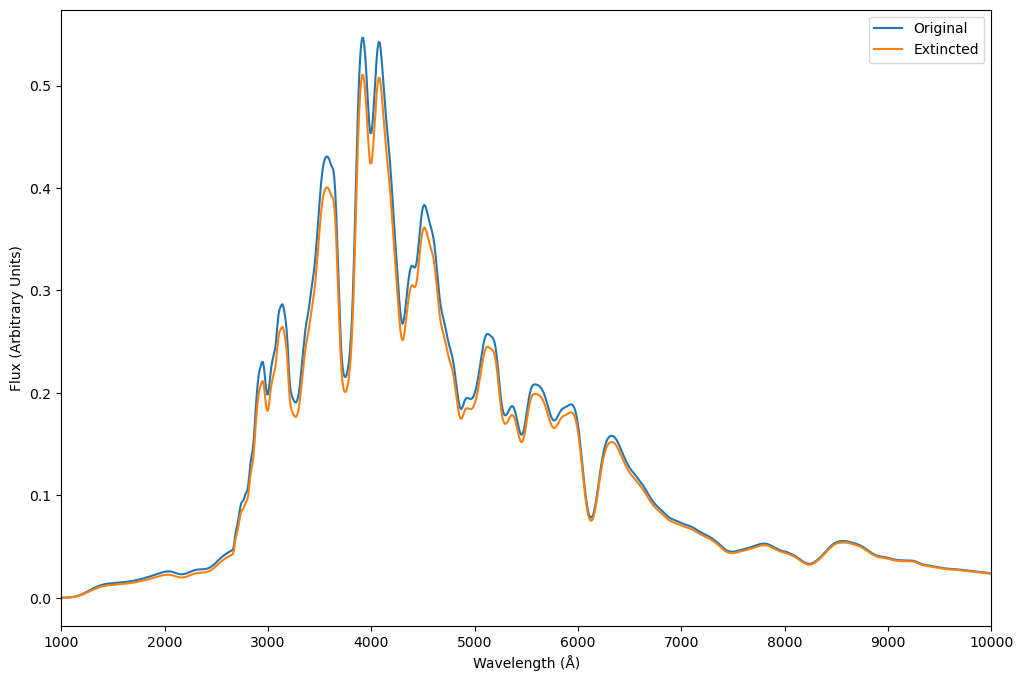

In [87]:
plt.figure(figsize=(12,8))

plt.plot(wvl_peak, test_flux_peak, label='Original')
plt.plot(wvl_peak, sp_ext(wvl_peak), label='Extincted')
plt.xlim([1000, 10000])
plt.ylabel('Flux (Arbitrary Units)') 
plt.xlabel('Wavelength (Å)') 
plt.legend()

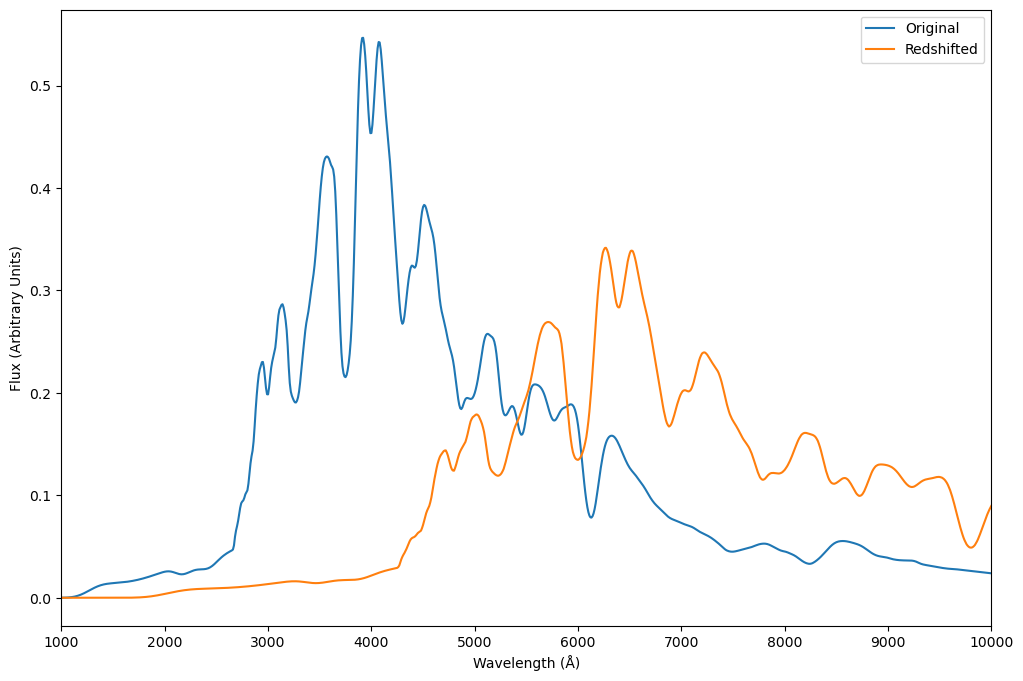

In [91]:
r = redshift(test_flux_peak, wvl_peak, 0.6, sp, option='sp')

plt.figure(figsize=(12,8))

plt.plot(wvl_peak, test_flux_peak, label='Original')
plt.plot(r[-1], r[1], label='Redshifted')
plt.xlim([1000, 10000])
plt.ylabel('Flux (Arbitrary Units)') 
plt.xlabel('Wavelength (Å)') 
plt.legend()

In [68]:
m = extinct(sp, wvl_peak, 0.6, sp)
# r = redshift(test_flux_peak, wvl_peak, 0.6, sp, option='sp')

# plt.plot(wvl, test_flux, label='og')
plt.plot(m[0], m[1], 'r--', alpha=0.5)
# plt.plot(r[3], r[1], 'g--', alpha=0.5, label='sp')
# plt.plot(r[3], r[2](r[3]), 'b--', alpha=0.5, label='sp2')
plt.legend()

TypeError: 'SourceSpectrum' object is not iterable

In [61]:
A = 54692352.905366234


In [62]:
normed_fluxes = A * snflux_1a['flux']

wvl_peak = snflux_1a['wvl'][snflux_1a['day'] == 0].values
test_flux_peak = normed_fluxes[snflux_1a['day'] == 0]
model = Empirical1D(points=wvl_peak, lookup_table=test_flux_peak)          # re initialize for every time point 
sp = SourceSpectrum(model, wave_unit='angstrom')

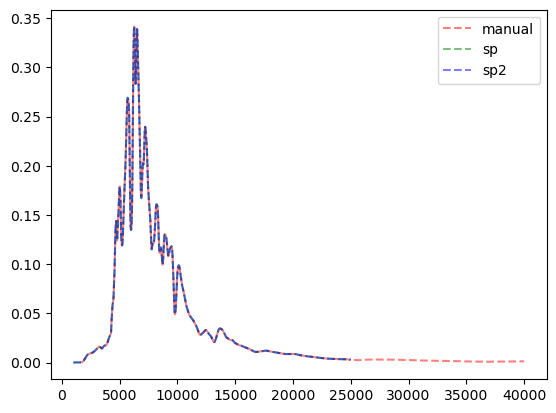

In [889]:
m = redshift(test_flux_peak, wvl_peak, 0.6, sp, option='man')
r = redshift(test_flux_peak, wvl_peak, 0.6, sp, option='sp')

# plt.plot(wvl, test_flux, label='og')
plt.plot(m[0], m[1], 'r--', alpha=0.5, label='manual')
plt.plot(r[3], r[1], 'g--', alpha=0.5, label='sp')
plt.plot(r[3], r[2](r[3]), 'b--', alpha=0.5, label='sp2')
plt.legend()

#### iii) Local and Successive

In [890]:
def local(sp_norm, wavelength, z=0.6, Av=0.05, Rv=3.1): 
    """returns OG wvl, flux at ultimate observation point (z=0), sp spectrum, OBS wvl. """
    
    res = extinct(sp_norm, wavelength, Av=Av, Rv=Rv)
    res_z = redshift(res[1], res[0], z, res[2], option='sp')

    # return res_z[0], res_z[2](res_z[0]), res_z[2]
    return res_z[-1], res_z[2](res_z[-1]), res_z[2], res_z[0]


def successive0(sp_norm, wavelength, zs, Avs, Rv=3.1): 
    """zs (decreasing redshift), Avs are arrays corresponding to successive z[0] (host), z[1] (1st gal), z[2] (2nd gal) etc. 
        with Av[0] (host), Av[1] (1st gal), Av[2] (2nd gal) etc. 
        returns: og wvl, flux in flam, at ultimate observation point (z=0).
        - outdated: only has functionality for 2 interventing gals"""

    # host
    z0 = zs[0]
    res0 = extinct(sp_norm, wavelength, Av=Avs[0], Rv=Rv)     # z = 0.6
    
    # gal 1
    z1 = zs[1]
    dz1 = z0-z1
    res0_gal1 = redshift(res0[1], res0[0], dz1, res0[2], option='sp')            # z = 0.3
    res1_gal1 = extinct(res0_gal1[2], res0_gal1[-1].value, Av=Avs[1], Rv=Rv) 
    
    # gal 2 
    z2 = zs[2]
    dz2 = z1-z2
    res1_gal2 = redshift(res1_gal1[1], res1_gal1[0], dz2, res1_gal1[2], option='sp')            # z = 0.12
    res2_gal2 = extinct(res1_gal2[2], res1_gal2[-1].value, Av=Avs[2], Rv=Rv)

    # observation point 
    z3 = 0 
    dz3 = z2-z3
    res2_obs = redshift(res2_gal2[1], res2_gal2[0], dz3, res2_gal2[2], option='sp')

    return res2_obs[-1], res2_obs[2](res2_obs[-1])         # = res2_obs[-1], res2_obs[1]


def successive(sp_norm, wavelength, zs, Avs, Rv=3.1): 
    """
    zs (decreasing redshift), Avs are arrays corresponding to successive z[0] (host), z[1] (1st gal), z[2] (2nd gal) etc. 
    with Av[0] (host), Av[1] (1st gal), Av[2] (2nd gal) etc. 
    returns: og wvl, flux in flam, at ultimate observation point (z=0), sp spectrum 
    """
    
    # zs = [0.6, 0.3, 0.12] 
    # Avs = [0.05, 0.02, 0.002]
    # Rv = 3.1
    
    for i in range(len(zs)): 

        if i == 0: 
            sp = sp_norm
        else: 
            sp = res_red[2]
        
        res_ext = extinct(sp, wavelength, Av=Avs[i], Rv=Rv)      # wavelength array doesn't change
        
        if i != len(zs)-1: 
            dz = zs[i] - zs[i+1]
        if i == len(zs)-1: 
            dz = zs[i] - 0 
        res_red = redshift(res_ext[1], res_ext[0], dz, res_ext[2], option='sp')

    return res_red[-1], res_red[1], res_red[2]
    # = return res_red[-1], res_red[2](res_red[-1]) 

Text(0.5, 1.0, 'day 0')

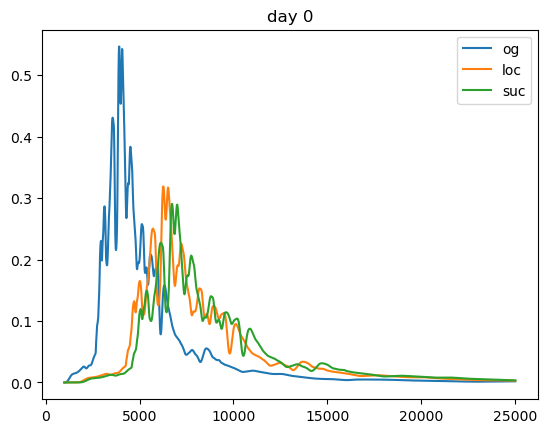

In [891]:
# re initialize for every time point 
wvl_peak = snflux_1a['wvl'][snflux_1a['day'] == 0].values
test_flux_peak = normed_fluxes[snflux_1a['day'] == 0]
model = Empirical1D(points=wvl_peak, lookup_table=test_flux_peak)          # re initialize for every time point 
sp = SourceSpectrum(model, wave_unit='angstrom')

l_peak = local(sp, wvl_peak, z=0.6, Av=0.05, Rv=3.1) 
g_peak = successive(sp, wvl_peak, 
                    [0.6, 0.3, 0.12],
                    [0.05, 0.02, 0.002], 
                    3.1)

plt.plot(wvl_peak, test_flux_peak, label='og')
plt.plot(l_peak[0], l_peak[1], label='loc')
plt.plot(g_peak[0], g_peak[1], label='suc')
plt.legend()
plt.title('day 0')

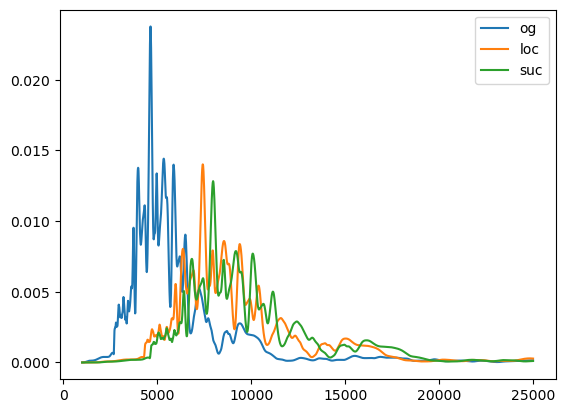

In [701]:
plt.plot(wvl, test_flux, label='og')
plt.plot(l[0], l[1], label='loc')
plt.plot(g[0], g[1], label='suc')
plt.legend()

#### iv) Get mags for LCs

In [702]:
g[0]

<Quantity [ 1000.,  1010.,  1020., ..., 24980., 24990., 25000.] Angstrom>

In [704]:
g[1]

<Quantity [6.24667290e-07, 6.24667290e-07, 6.24667290e-07, ...,
           1.04955309e-04, 1.05393610e-04, 1.05812314e-04] PHOTLAM>

In [898]:
all_days = snflux_1a['day'].unique()

all_fluxes = np.zeros_like(all_days)
all_fluxes_filter = np.zeros_like(all_days)
all_mags = np.zeros_like(all_days)
all_mags_filter = np.zeros_like(all_days)

test_flux_vega = vega(test_wvl.values, flux_unit=units.FLAM)
test_flux_vega_int = np.trapz(test_flux_vega, test_wvl)

test_flux_vega_filter = vega(des_wvl, flux_unit=units.FLAM)
test_flux_vega_filter_int = np.trapz(test_flux_vega_filter, des_wvl)

f = 0
des = np.loadtxt(file_paths[f])    # des_g_model
des_wvl = des[:, 0]
des_tpt = des[:, 1]

# normalize all fluxes here based on one factor. 
normed_fluxes = A * snflux_1a['flux']


In [899]:
for i,d in enumerate(all_days): 
    # test_wvl = snflux_1a['wvl'][snflux_1a['day'] == d]
    # test_flux = snflux_1a['flux'][snflux_1a['day'] == d]   

    test_wvl = snflux_1a['wvl'][snflux_1a['day'] == d]
    test_flux = normed_fluxes[snflux_1a['day'] == d]   

    start_ind = np.where(test_wvl == des_wvl[0])[0][0]
    end_ind = np.where(test_wvl == des_wvl[-1])[0][0]
    overlap1 = test_wvl.values[start_ind:end_ind+1]
    overlap2 = des_wvl[::2] 

    overlap_wvl = overlap2
    overlap_flux = test_flux.values[start_ind:end_ind+1]
    transmission = des_tpt[::2]

    # integrate without des filter first. 
    # NOW WITH DES! 

    num = np.trapz(transmission * overlap_flux, overlap_wvl)
    denom = np.trapz(transmission, overlap_wvl)

    F_obs = num/denom

    vega_filter = vega(overlap_wvl, flux_unit=units.FLAM)             # same sampling as sn obs 
    num_vega = np.trapz(transmission * vega_filter, overlap_wvl)     
    denom_vega = np.trapz(transmission, overlap_wvl)
    F_vega = (num_vega/denom_vega).value

    # all_fluxes[i] = np.trapz(test_flux, test_wvl)
    ## all_fluxes_filter[i] = num/denom  # F_obs    ## more outdated don't use 
    # all_fluxes_filter[i] = num
    # all_mags[i] = -2.5 * np.log10(all_fluxes[i] / test_flux_vega_int.value)
    # all_mags_filter[i] = -2.5 * np.log10(all_fluxes_filter[i] / test_flux_vega_filter_int.value)   # oops i didn't not divide by filter transmission!??

    all_mags_filter[i] = -2.5 * np.log10(F_obs / F_vega)   # -19.27 for g band pea

In [900]:
all_mags_filter.min()

-19.27520897256545

In [708]:
l

(<Quantity [ 1000.,  1010.,  1020., ..., 24980., 24990., 25000.] Angstrom>,
 <Quantity [7.45881245e-07, 7.45881245e-07, 7.45881245e-07, ...,
            2.80171280e-04, 2.78934595e-04, 2.77615398e-04] PHOTLAM>,
 <Quantity [ 1600.,  1616.,  1632., ..., 39968., 39984., 40000.] Angstrom>)

In [709]:
g

(<Quantity [ 1000.,  1010.,  1020., ..., 24980., 24990., 25000.] Angstrom>,
 <Quantity [6.24667290e-07, 6.24667290e-07, 6.24667290e-07, ...,
            1.04955309e-04, 1.05393610e-04, 1.05812314e-04] PHOTLAM>,
 <synphot.spectrum.SourceSpectrum at 0x7fd9a44b30d0>)

In [711]:
vega(overlap_wvl, flux_unit=units.FLAM)

<Quantity [3.58284779e-09, 6.47833522e-09, 7.21045931e-09, 4.86670791e-09,
           4.19220048e-09, 7.22897432e-09, 8.26327594e-09, 8.12943710e-09,
           6.19182475e-09, 3.55268505e-09, 6.25598985e-09, 8.21032148e-09,
           8.78553716e-09, 8.64009280e-09, 8.60362373e-09, 8.08223972e-09,
           6.28165074e-09, 3.47883015e-09, 5.80118831e-09, 7.76905426e-09,
           8.46484379e-09, 8.70122761e-09, 8.75441475e-09, 8.69629779e-09,
           8.69703270e-09, 8.57166234e-09, 8.37702237e-09, 8.12148615e-09,
           7.62295004e-09, 6.22074056e-09, 3.56643473e-09, 4.94364693e-09,
           6.87661796e-09, 7.60408319e-09, 7.97982693e-09, 8.04984435e-09,
           8.07508436e-09, 8.00064027e-09, 7.92493360e-09, 7.95177753e-09,
           7.87642317e-09, 7.86139378e-09, 7.78889599e-09, 7.67975106e-09,
           7.67773788e-09, 7.58071039e-09, 7.54844726e-09, 7.45550493e-09,
           7.36147078e-09, 7.25076317e-09, 7.00637963e-09, 6.81063672e-09,
           6.31145834e-09

In [712]:
vega(overlap_wvl)

<Quantity [ 685.38599009, 1242.54366635, 1386.59478015,  938.33371974,
            810.39459463, 1401.07272728, 1605.69416029, 1583.77946612,
           1209.41026127,  695.71213351, 1228.24190302, 1616.07007203,
           1733.71479252, 1709.36270742, 1706.47880421, 1607.13400735,
           1252.25345702,  695.25960968, 1162.31355503, 1560.5019582 ,
           1704.52041375, 1756.50006278, 1771.64392185, 1764.26052481,
           1768.78780572, 1747.60526984, 1712.13882902, 1663.99947484,
           1565.69261981, 1280.82166416,  736.10777368, 1022.85138111,
           1426.24909172, 1580.95743928, 1663.09508964, 1681.7399747 ,
           1691.07810379, 1679.51569484, 1667.61265253, 1677.26433211,
           1665.33496064, 1666.11476948, 1654.67087599, 1635.35023537,
           1638.78660503, 1621.89263981, 1618.78992166, 1602.6113149 ,
           1586.10388713, 1565.90092266, 1516.65006691, 1477.70673769,
           1372.57705353, 1096.04867831,  658.85858929,  979.96813827,
      

In [901]:
file_paths = ['des_g.txt', 'des_r.txt', 'des_i.txt', 'des_z.txt', 'des_Y.txt']  # in order of increasing wavelength 
## note this is changed from before where i & r were switched 

In [931]:
normed_fluxes = A * snflux_1a['flux']                # A = 54692352.905366234
test_wvl = snflux_1a['wvl'][snflux_1a['day'] == 0]   # all same wvl array 

def calc_mag(filt, flux_og, flux_loc, flux_suc, v=False): 
    """inputs: filt (0-4), flux_og (original flux), flux_loc (host dust only), flux_suc (successive) 
    outputs: mags (og, loc, suc)
    """
    des = np.loadtxt(file_paths[filt])
    des_wvl = des[:, 0]
    des_tpt = des[:, 1]
    transmission = des_tpt[::2]
    start_ind = np.where(test_wvl == des_wvl[0])[0][0]    # 280 same for all 
    end_ind = np.where(test_wvl == des_wvl[-1])[0][0]     # 1000 same for all 
    
    overlap1 = test_wvl.values[start_ind:end_ind+1] 
    overlap2 = des_wvl[::2]                               # equivalent; overlap1 == overlap 2
    overlap_wvl = overlap2

    if v == True: 
        transmission = v_band(overlap2)

    ## now calculate fluxes by observing thru bandpass 
    overlap_flux0 = flux_og[start_ind:end_ind+1]
    num0 = np.trapz(transmission * overlap_flux0, overlap_wvl)
    denom0 = np.trapz(transmission, overlap_wvl)                  # same for all, technically don't need this bc divide by F_vega but good for rigor 
    F_obs0 = num0 / denom0 

    overlap_flux_loc = flux_loc[start_ind:end_ind+1]
    num_loc = np.trapz(transmission * overlap_flux_loc, overlap_wvl)
    denom_loc = np.trapz(transmission, overlap_wvl)
    F_obs_loc = num_loc / denom_loc

    overlap_flux_suc = flux_suc[start_ind:end_ind+1]
    num_suc = np.trapz(transmission * overlap_flux_suc, overlap_wvl)
    denom_suc = np.trapz(transmission, overlap_wvl)
    F_obs_suc = num_suc / denom_suc

    vega_filter = vega(overlap_wvl, flux_unit=units.FLAM)             # same sampling as sn obs; note technically this should not be in flam units but we alr normed w A so doesn't matter
    num_vega = np.trapz(transmission * vega_filter, overlap_wvl)     
    denom_vega = np.trapz(transmission, overlap_wvl)
    F_vega = (num_vega/denom_vega).value
    
    mag0 = -2.5 * np.log10(F_obs0 / F_vega)                        # -19.27 for g band peak (day 0) 
    mag_loc = -2.5 * np.log10(F_obs_loc / F_vega)
    mag_suc = -2.5 * np.log10(F_obs_suc / F_vega)

    return mag0, mag_loc, mag_suc

In [903]:
def get_des_mags(flux_og, flux_loc, flux_suc):    # for all filters 

    des_mags_og = np.zeros(5)
    des_mags_loc = np.zeros(5)
    des_mags_suc = np.zeros(5)
    
    for f in range(5): 
        mags = calc_mag(f, flux_og, flux_loc, flux_suc)     
        des_mags_og[f] = mags[0]
        des_mags_loc[f] = mags[1]
        des_mags_suc[f] = mags[2]

    return des_mags_og, des_mags_loc, des_mags_suc


In [904]:
## reinitialize for all dys
all_days = snflux_1a['day'].unique()
all_sp = []
all_og = []
all_loc = []
all_suc = []

for i, d in enumerate(all_days): 
    wavelength = snflux_1a['wvl'][snflux_1a['day'] == d].values
    flux = normed_fluxes[snflux_1a['day'] == d].values
    all_og.append(flux) 
    model = Empirical1D(points=wavelength, lookup_table=flux) 
    sp = SourceSpectrum(model, wave_unit='angstrom')
    all_sp.append(sp) 

    loc = local(sp, wavelength, z=0.6, Av=0.05, Rv=3.1) 
    all_loc.append(loc[1].value)
    suc = successive(sp, wavelength, 
                    [0.6, 0.3, 0.12],
                    [0.05, 0.02, 0.002], 
                    3.1)
    all_suc.append(suc[1].value)


In [905]:
all_days_mags_og = np.zeros((len(all_sp), len(des_filters)))
all_days_mags_loc = np.zeros((len(all_sp), len(des_filters)))
all_days_mags_suc = np.zeros((len(all_sp), len(des_filters)))

## across time now 
for i in range(len(all_days)): 
    des_mags = get_des_mags(all_og[i], all_loc[i], all_suc[i])
    all_days_mags_og[i] = des_mags[0]
    all_days_mags_loc[i] = des_mags[1]
    all_days_mags_suc[i] = des_mags[2]


In [947]:
# v band magnitudes (LCs) for all days: 
all_v_mags_og = np.zeros(len(all_days))
all_v_mags_loc = np.zeros(len(all_days))
all_v_mags_suc = np.zeros(len(all_days))

## v band magnitudes 
for i, d in enumerate(all_days): 
    v_mags = calc_mag(0, all_og[i], all_loc[i], all_suc[i], v=True)
    all_v_mags_og[i] = v_mags[0] 
    all_v_mags_loc[i] = v_mags[1]
    all_v_mags_suc[i] = v_mags[2]


In [963]:
## get effective wavelength so can plot E(\lambda - V) as a function of eff wvl 
# ['g', 'r', 'i', 'z', 'Y']

# intrinsic color diff E(lambda - V)
g_v0 = all_days_mags_og[:,0] - all_v_mags_og
r_v0 = all_days_mags_og[:,1] - all_v_mags_og
i_v0 = all_days_mags_og[:,2] - all_v_mags_og
z_v0 = all_days_mags_og[:,3] - all_v_mags_og
Y_v0 = all_days_mags_og[:,4] - all_v_mags_og

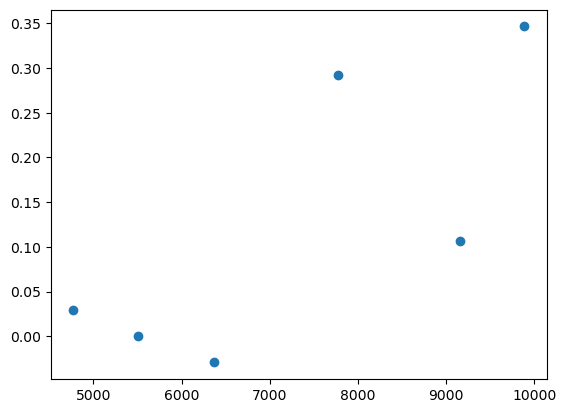

In [1010]:
# from decam website: CWL = 
    # g = 4770.80
    # r = 6371.30
    # i = 7774.20
    # z = 9157.90
    # Y = 9886.30

# V = 5510  

g_cwl = 4770.80
r_cwl = 6371.30
i_cwl = 7774.20
z_cwl = 9157.90
Y_cwl = 9886.30
v_cwl = 5510  

## peak is 20 (day 0) 
plt.plot([g_cwl, r_cwl, i_cwl, z_cwl, Y_cwl, v_cwl], 
         [g_v0[20], r_v0[20], i_v0[20], z_v0[20], Y_v0[20], 0], 'o')

## so there's no correlation?!?! !uahasdhfa

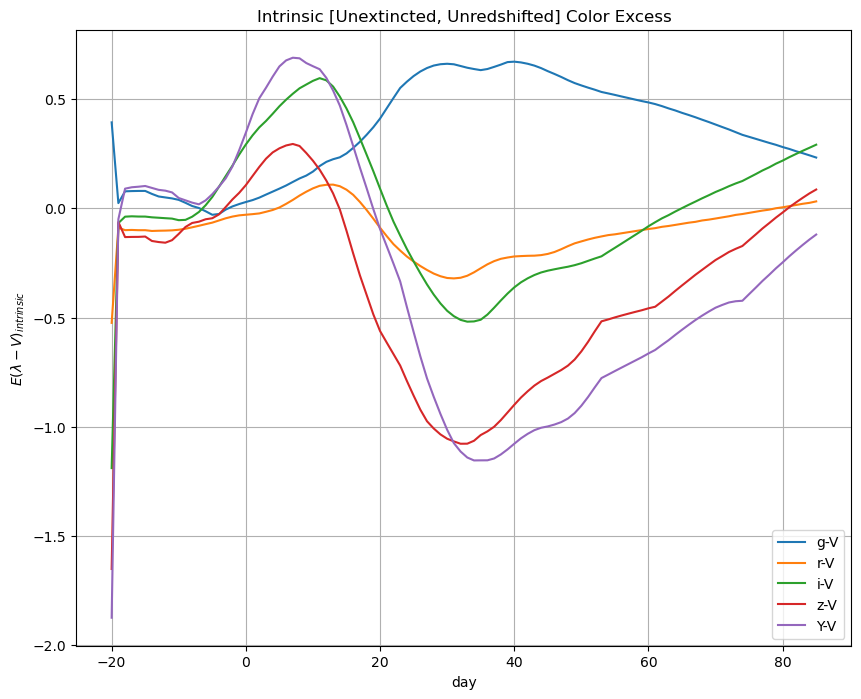

In [1016]:
l_v0s = [g_v0, r_v0, i_v0, z_v0, Y_v0]
names = ['g-V', 'r-V', 'i-V', 'z-V', 'Y-V']
plt.figure(figsize=(10, 8))

for i, l_v in enumerate(l_v0s): 
    plt.plot(all_days, l_v, label=f'{names[i]}')
    plt.legend()
    plt.xlabel('day')
    plt.ylabel(r'$E(\lambda-V)_{intrinsic}$')
    plt.title('Intrinsic [Unextincted, Unredshifted] Color Excess')
    plt.legend()
    plt.grid()

#### Note: should i have made sure that a_v curve (i.e. ccm89 in nsynphot) shifts with redshift?... i applied it assuming in rest frame. 
    * wait no i think i did it right because we are observing redshifted light that is now being extincted in rest frame. 

In [994]:
start_ind = 280
end_ind = 1000

def eff_wvl(wvl, flux, tpt): 
    num = np.trapz(flux * tpt * wvl**2, x=wvl)
    denom = np.trapz(flux * tpt * wvl, x=wvl)

    return num / denom


In [988]:
des_wvl = des[:, 0]
overlap_wvl = des_wvl[::2]
v_tpt = v_band(overlap_wvl)  # tpt = des_tpt[::2]

In [1000]:
eff_wvl(overlap_wvl, all_og[20][start_ind:end_ind+1], v_tpt)

<Quantity 5464.62312677>

In [999]:
v_band.avgwave()

<Quantity 5490.55520036 Angstrom>

In [1004]:
for i in range(5): 
    print(des_filters[i].avgwave()) # g i r z Y

4826.802740139218 Angstrom
7826.6803062089175 Angstrom
6432.0626381921265 Angstrom
9178.949537472385 Angstrom
9899.65087304703 Angstrom


In [ ]:
# maybe just plot against central wavelength instead? bc effective wavelengths are different depending on flux. 

# from decam website: CWL = 
    # g = 4770.80
    # r = 6371.30
    # i = 7774.20
    # z = 9157.90
    # Y = 9886.30

# V = 5510  

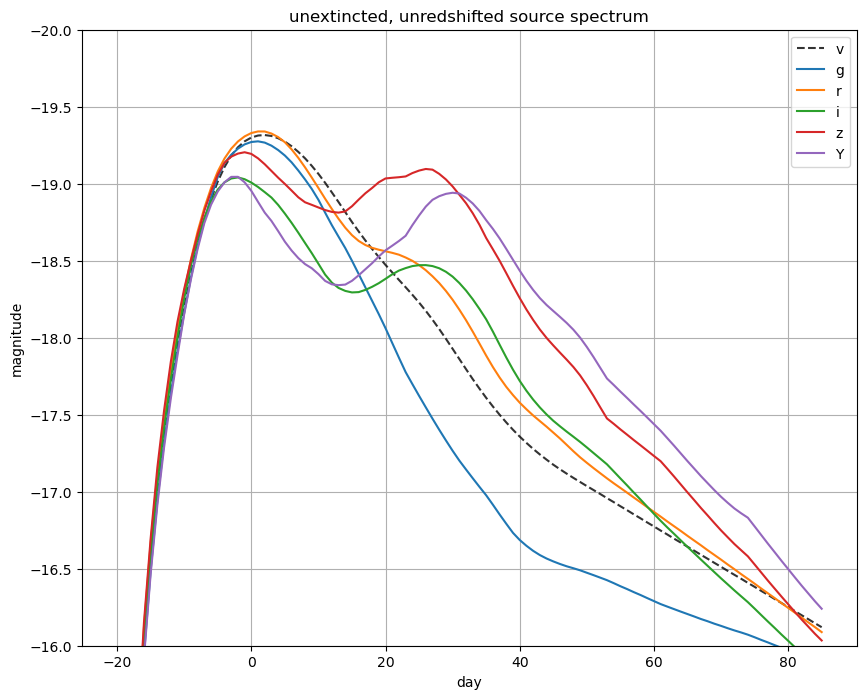

In [958]:
filt_names = ['g', 'r', 'i', 'z', 'Y']

plt.figure(figsize=(10, 8))
plt.plot(all_days, all_v_mags_og, 'k--', alpha=0.8, label='v')
for i, filt in enumerate(filt_names): 
    plt.plot(all_days, all_days_mags_og[:, i], label=f'{filt}')
    plt.xlabel('day')
    plt.ylabel('magnitude')
    plt.gca().invert_yaxis()
    plt.ylim([-16, -20])
    plt.title('unextincted, unredshifted source spectrum')
    plt.legend()
    plt.grid()

In [1015]:
## now let's get color excess for the locally extincted spectrum 

g_v0 = all_days_mags_og[:,0] - all_v_mags_og
r_v0 = all_days_mags_og[:,1] - all_v_mags_og
i_v0 = all_days_mags_og[:,2] - all_v_mags_og
z_v0 = all_days_mags_og[:,3] - all_v_mags_og
Y_v0 = all_days_mags_og[:,4] - all_v_mags_og


g_v_loc = all_days_mags_loc[:,0] - all_v_mags_loc
r_v_loc = all_days_mags_loc[:,0] - all_v_mags_loc
i_v_loc = all_days_mags_loc[:,0] - all_v_mags_loc
z_v_loc = all_days_mags_loc[:,0] - all_v_mags_loc
Y_v_loc = all_days_mags_loc[:,0] - all_v_mags_loc

g_v_loc_ex = g_v_loc - g_v0
r_v_loc_ex = r_v_loc - r_v0
i_v_loc_ex = i_v_loc - i_v0
z_v_loc_ex = z_v_loc - z_v0
Y_v_loc_ex = Y_v_loc - Y_v0


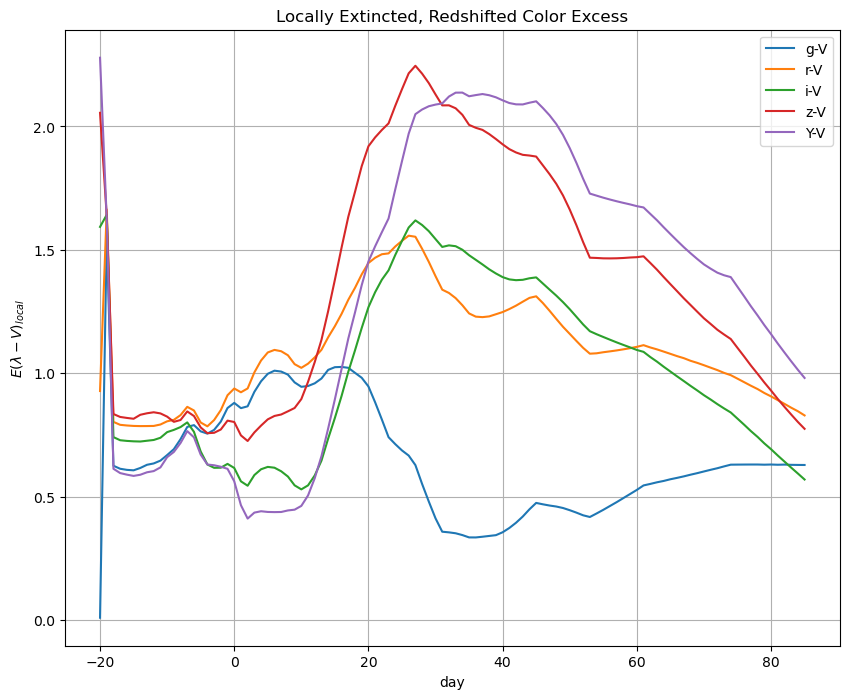

In [1017]:
l_v_locs = [g_v_loc_ex, r_v_loc_ex, i_v_loc_ex, z_v_loc_ex, Y_v_loc_ex]
names = ['g-V', 'r-V', 'i-V', 'z-V', 'Y-V']
plt.figure(figsize=(10, 8))

for i, l_v in enumerate(l_v_locs): 
    plt.plot(all_days, l_v, label=f'{names[i]}')
    plt.legend()
    plt.xlabel('day')
    plt.ylabel(r'$E(\lambda-V)_{local}$')
    plt.title('Locally Extincted, Redshifted Color Excess')
    plt.legend()
    plt.grid()

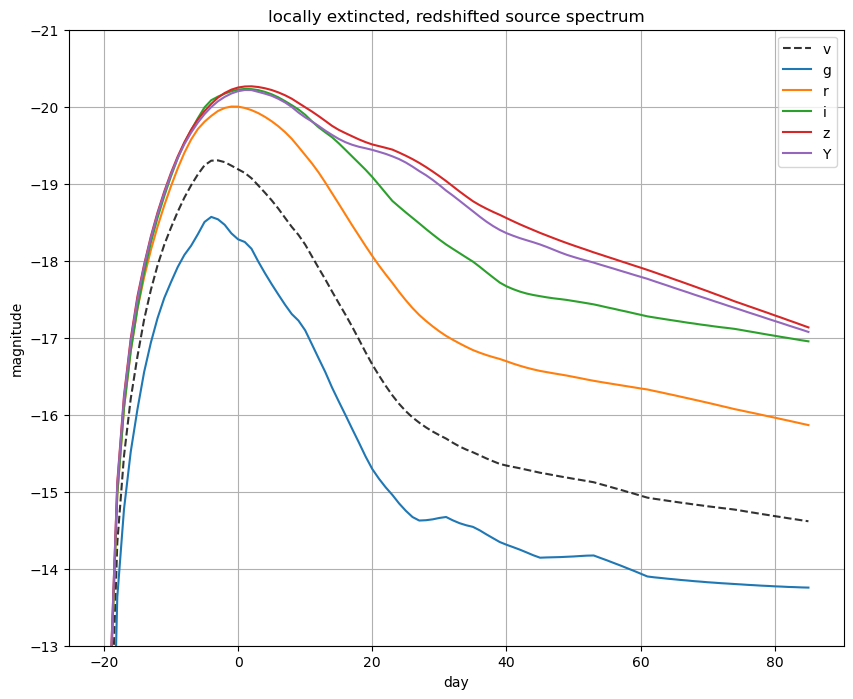

In [959]:
filt_names = ['g', 'r', 'i', 'z', 'Y']

plt.figure(figsize=(10, 8))
plt.plot(all_days, all_v_mags_loc, 'k--', alpha=0.8, label='v')

for i, filt in enumerate(filt_names): 
    plt.plot(all_days, all_days_mags_loc[:, i], label=f'{filt}')
    plt.xlabel('day')
    plt.ylabel('magnitude')
    plt.gca().invert_yaxis()
    plt.ylim([-13, -21])
    plt.title('locally extincted, redshifted source spectrum')
    plt.legend()
    plt.grid()

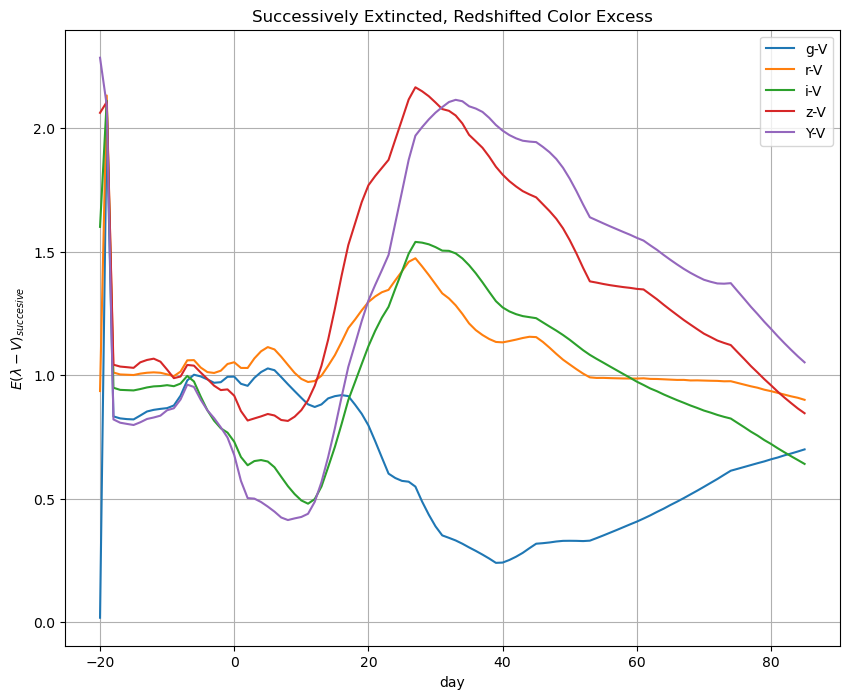

In [1019]:
## color excess for the successive

g_v_suc = all_days_mags_suc[:,0] - all_v_mags_suc
r_v_suc = all_days_mags_suc[:,0] - all_v_mags_suc
i_v_suc = all_days_mags_suc[:,0] - all_v_mags_suc
z_v_suc = all_days_mags_suc[:,0] - all_v_mags_suc
Y_v_suc = all_days_mags_suc[:,0] - all_v_mags_suc

g_v_suc_ex = g_v_suc - g_v0
r_v_suc_ex = r_v_suc - r_v0
i_v_suc_ex = i_v_suc - i_v0
z_v_suc_ex = z_v_suc - z_v0
Y_v_suc_ex = Y_v_suc - Y_v0

l_v_sucs = [g_v_suc_ex, r_v_suc_ex, i_v_suc_ex, z_v_suc_ex, Y_v_suc_ex]
names = ['g-V', 'r-V', 'i-V', 'z-V', 'Y-V']
plt.figure(figsize=(10, 8))

for i, l_v in enumerate(l_v_sucs): 
    plt.plot(all_days, l_v, label=f'{names[i]}')
    plt.legend()
    plt.xlabel('day')
    plt.ylabel(r'$E(\lambda-V)_{succesive}$')
    plt.title('Successively Extincted, Redshifted Color Excess')
    plt.legend()
    plt.grid()

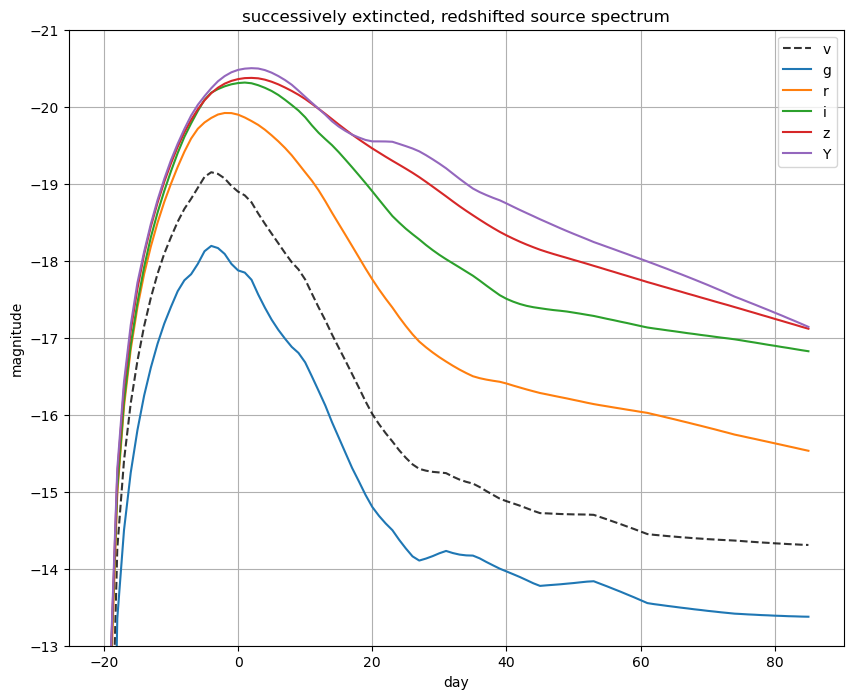

In [960]:
filt_names = ['g', 'r', 'i', 'z', 'Y']

plt.figure(figsize=(10, 8))
plt.plot(all_days, all_v_mags_suc, 'k--', alpha=0.8, label='v')

for i, filt in enumerate(filt_names): 
    plt.plot(all_days, all_days_mags_suc[:, i], label=f'{filt}')
    plt.xlabel('day')
    plt.ylabel('magnitude')
    plt.gca().invert_yaxis()
    plt.ylim([-13, -21])
    plt.title('successively extincted, redshifted source spectrum')
    plt.legend()
    plt.grid()

In [1029]:
## what about the color excesses / diffs between the two? 
np.mean(g_v_suc_ex - g_v_loc_ex), np.mean(r_v_suc_ex - r_v_loc_ex), np.mean(i_v_suc_ex - i_v_loc_ex)
# np.mean(z_v_suc_ex - z_v_loc_ex)
# np.mean(Y_v_suc_ex - Y_v_loc_ex)

(-0.01220909844787934, -0.01220909844787934, -0.01220909844787934)

In [ ]:
## look at curves individually? 


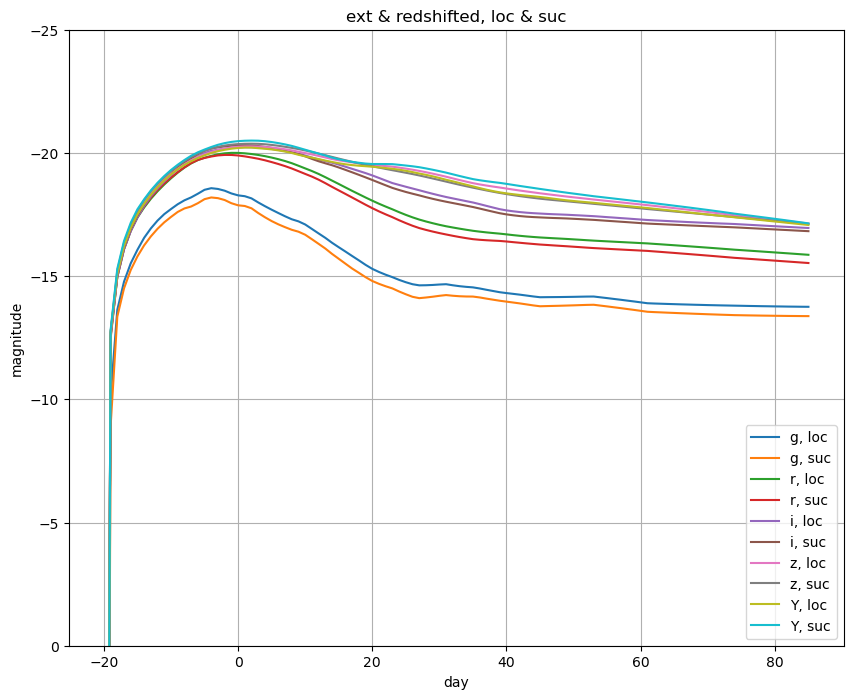

In [909]:
filt_names = ['g', 'r', 'i', 'z', 'Y']

plt.figure(figsize=(10, 8))
for i, filt in enumerate(filt_names): 
    plt.plot(all_days, all_days_mags_loc[:, i], label=f'{filt}, loc')
    plt.plot(all_days, all_days_mags_suc[:, i], label=f'{filt}, suc')
    plt.xlabel('day')
    plt.ylabel('magnitude')
    plt.gca().invert_yaxis()
    plt.ylim([0, -25])
    plt.title('ext & redshifted, loc & suc')
    plt.legend()
    plt.grid()

In [877]:
## fluxes for all bands for loc and suc

# all_suc

In [853]:
## check that suc mags are always less bright... um no and idk why??!?! 
    #         * bc more overlap bw filters maybe (i.e. larger area of sn spectrum overlap w/ filter 
                # of observation for suc, bc more redshifted)?. this is dependent on redshifting though. 
    # so would change w/ choice of intervening gals 
for i in range(5):
    print(np.where((all_days_mags_loc[:,i] - all_days_mags_suc[:,i]) > 0))


(array([], dtype=int64),)
(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),)
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),)
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38]),)
(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105]),)


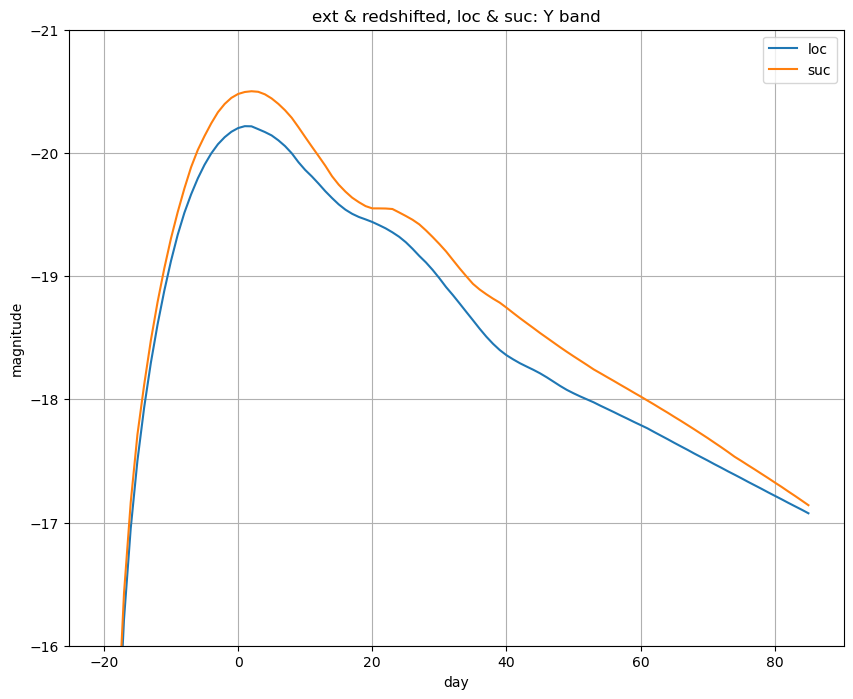

In [912]:
plt.figure(figsize=(10, 8))
plt.plot(all_days, all_days_mags_loc[:,4], label='loc')
plt.plot(all_days, all_days_mags_suc[:,4], label='suc')
plt.xlabel('day')
plt.ylabel('magnitude')
plt.gca().invert_yaxis()
plt.ylim([-16, -21])
plt.title('ext & redshifted, loc & suc: Y band')
plt.legend()
plt.grid()

### Look at color excesses $E(\lambda - V)$

In [ ]:
* do you need to use the formula compared to the intrinsic color? YES. E(B-V) = (B-V)_obs - (B-V)_true 
ii) would look at same band across loc & suc but it doesn’t make sense here since suc brighter than loc in redder bands based on z’s of gals. 

## v band
obs_v_loc = Observation(res_z[2], v_band)
obs_v_suc = Observation(res_red[2], v_band)
obs_v_before = Observation(sp_norm, v_band)

sp_v_before = obs_v_before.effstim(flux_unit='vegamag', vegaspec=vega)    # vega system 
sp_v_loc = obs_v_loc.effstim(flux_unit='vegamag', vegaspec=vega)
sp_v_suc = obs_v_suc.effstim(flux_unit='vegamag', vegaspec=vega)

print('before dust, V =', np.round(sp_v_before,1))
print('after LOCAL dust, V =', np.round(sp_v_loc,1))
print('after SUCCESSIVE dust, V =', np.round(sp_v_suc,1)) 

## compare to v band: (maybe more worth it to compare to g or r band?) 
Av_calc_loc = sp_v_loc.value - sp_v_before.value
Av_calc_suc = sp_v_suc.value - sp_v_before.value

color_diff_loc = all_mags_loc - all_mags_og 
color_diff_suc = all_mags_suc - all_mags_og 

color_excess_loc = color_diff_loc - Av_calc_loc
color_excess_suc = color_diff_suc - Av_calc_suc

In [ ]:
# intrinsic e(lam - v) 


#### v) more trial fixing 

In [365]:
## check for 0, g (des_filters[0]) if its near that magnitude
normed_fluxes = A * snflux_1a['flux']

test_wvl = snflux_1a['wvl'][snflux_1a['day'] == 0]
# test_flux = snflux_1a['flux'][snflux_1a['day'] == 0] 
test_flux = normed_fluxes[snflux_1a['day'] == 0] 

overlap2 = des_wvl[::2] 
overlap_wvl = overlap2
overlap_flux = test_flux.values[start_ind:end_ind+1]
transmission = des_tpt[::2]

num = np.trapz(transmission * overlap_flux, overlap_wvl) 
denom = np.trapz(transmission, overlap_wvl)
F_obs = num / denom 


vega_filter = vega(des_wvl[::2], flux_unit=units.FLAM)
num_vega = np.trapz(transmission * vega_filter, overlap_wvl) 
denom_vega = np.trapz(transmission, overlap_wvl)
F_vega = (num_vega / denom_vega).value

mag = -2.5 * np.log10(F_obs / F_vega)
mag

-19.27095355122305

In [364]:
## check for 0, V BAND if its near that magnitude
normed_fluxes = A * snflux_1a['flux']

test_wvl = snflux_1a['wvl'][snflux_1a['day'] == 0]
# test_flux = snflux_1a['flux'][snflux_1a['day'] == 0] 
test_flux = normed_fluxes[snflux_1a['day'] == 0] 


transmission = v_band(test_wvl.values)

num = np.trapz(transmission * test_flux, test_wvl) 
denom = np.trapz(transmission, test_wvl)
F_obs = num / denom 


vega_filter = vega(test_wvl.values, flux_unit=units.FLAM)
num_vega = np.trapz(transmission * vega_filter, test_wvl) 
denom_vega = np.trapz(transmission, test_wvl)
F_vega = (num_vega / denom_vega).value

mag = -2.5 * np.log10(F_obs / F_vega)
mag

<Quantity -19.3>

In [349]:
# as observed through v band, magnitude is -19.3 
# can use test_wvl for this (more densely sampled), try also des_wvl just to see

throughput = v_band(test_wvl.values)

vega_filter = vega(test_wvl.values, flux_unit=units.FLAM)
F_vega_v = np.trapz(throughput * vega_filter, test_wvl.values).value

test_wvl = snflux_1a['wvl'][snflux_1a['day'] == 0]     # make sure d = 0 
test_flux = snflux_1a['flux'][snflux_1a['day'] == 0]   
F_sn_v = np.trapz(test_flux * throughput, test_wvl.values)

mag_v = -19.3
A = (F_vega_v / F_sn_v) * 10**(mag_v / -2.5)    # normalization factor by which to multiply all sn_fluxes initally. 
A


54692352.905366234

In [355]:
# check that this is right ... yes! 
normed_fluxes = A * snflux_1a['flux']
normed_fluxes

0         7.110164e-31
1         7.110164e-31
2         7.110164e-31
3         7.110164e-31
4         7.110164e-31
              ...     
254501    1.556993e-04
254502    1.558520e-04
254503    1.559945e-04
254504    1.561273e-04
254505    1.562507e-04
Name: flux, Length: 254506, dtype: float64

(20.0, 3.0)

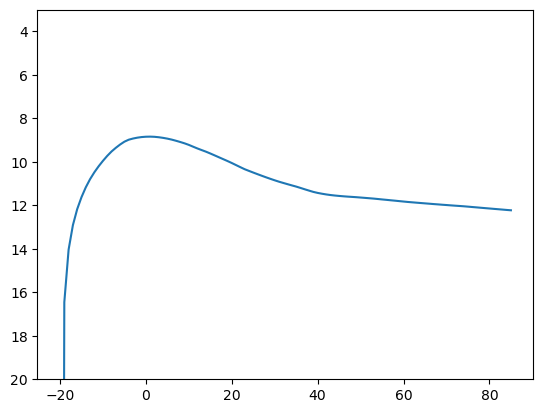

In [236]:
plt.plot(all_days, all_mags_filter)
plt.gca().invert_yaxis()
# plt.yscale('log')
plt.ylim([20, 3])

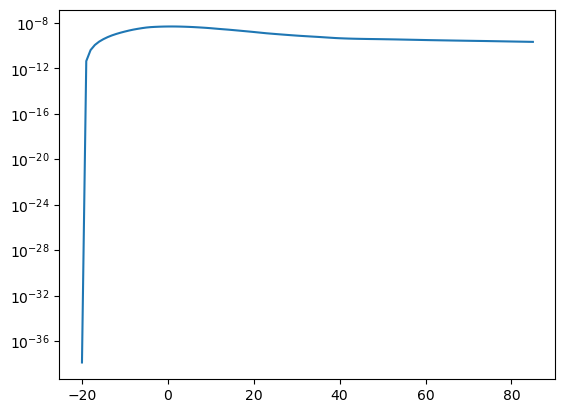

In [204]:
plt.plot(all_days, all_fluxes_filter)
plt.yscale('log')

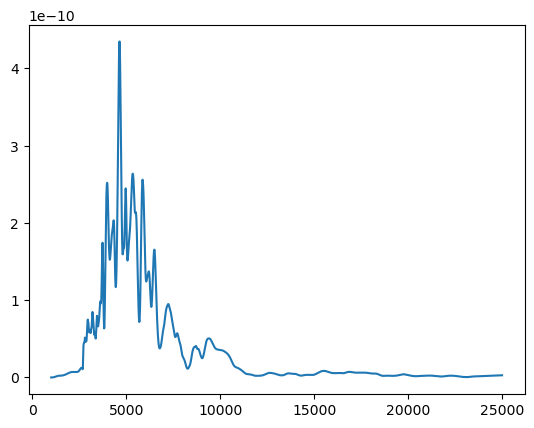

In [143]:
plt.plot(test_wvl, test_flux)

In [ ]:
# now try with the filter observation. (all 3 types: none, local, successive) 

des = np.loadtxt(file_paths[0])    # des_g_model
des_wvl = des[:, 0]
des_tpt = des[:, 1]
# Observation(sp_norms[0], des_filters[0]).binset # this does show the correct overlapping.. 


### this literally works with the filter observation too!!!! so i think the problem is really just the units. 
    # just manually scale / norm it so that b band has -19.3 mag 

In [ ]:
# now try with the local & successive redshifting / extinction. 
    # honestly the problem might be with the scale of the units... 


(5.0, -2.0)

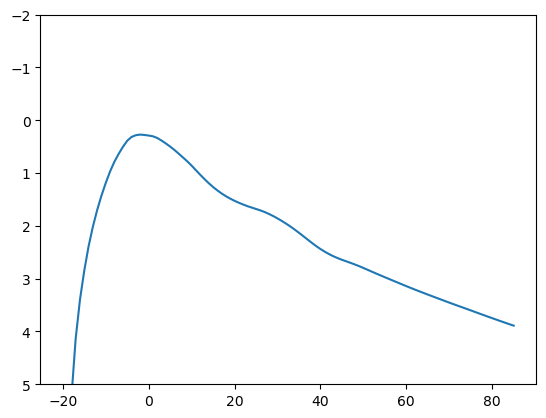

In [123]:
plt.plot(all_days, all_mags)
plt.gca().invert_yaxis()
plt.ylim([5, -2])

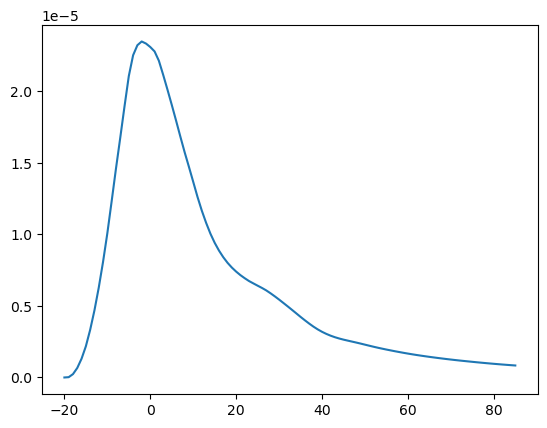

In [106]:
plt.plot(all_days, all_fluxes)

## Trial stuff

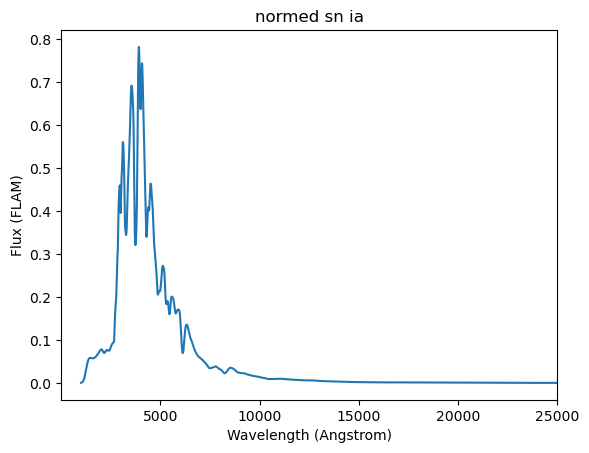

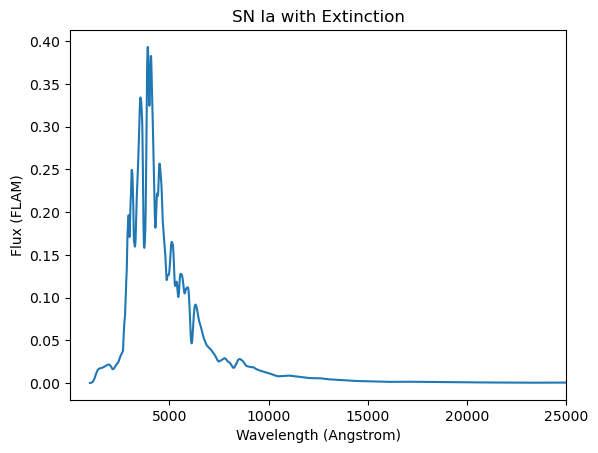

In [9]:
# trial stuff

wavelength = snflux_1a['wvl'][cond].values
flux = snflux_1a['flux'][cond].values

model = Empirical1D(points=wavelength, lookup_table=flux)
sp = SourceSpectrum(model, wave_unit='angstrom', flux_unit=units.FLAM)

vega = SourceSpectrum.from_vega()
vmag = -19.3

v_band = SpectralElement.from_filter('johnson_v')
sp_norm = sp.normalize(vmag * units.VEGAMAG, v_band, vegaspec=vega)
sp_norm.plot(left=10, right=25000, flux_unit='flam', title='normed sn ia')
# idk why the flux is so huge lol 

### exinction
ext = CCM89(Rv=3.1)
Av = 0.5 

wav = wavelength*u.Angstrom

ex = ReddeningLaw(ext).extinction_curve(Av / ext.Rv, wavelengths=wav)
sp_ext = sp_norm*ex
sp_ext.plot(left=10, right=25000, flux_unit='flam',
            title='SN Ia with Extinction')

sp_ext(wav, flux_unit=units.FLAM)   # FLAM = erg s − 1 cm − 2 A ˚ − 1

In [ ]:
### QUESTIONS: 0 - make sure my thought process for steps is correct. 

# 1) how does time play a role? do we integrate over all time?? 
# 2) redshifted (1 - redshift  to be at supernova redshift, 2) de-redshift based on redshift of all gals) 
    # & then finally? convolve this with DES 
# 2.5) i'm confused how i would get a value for every redshift? well i guess i would shift it based on redshift of supernova
    # i.e., mean redshift of every bin. 
# 3) do i care about the area of telescope at all? 

In [16]:
import synphot

## erg / cm^2 / s / Hz are units but have arbitrary normalization. 
    # fix normalization so that you get the right absolute magnitude. z=0, d_L = 10 pc ==> M_r = -19. 

    # each one of these has redshift changes, cm, s and Hz 

In [22]:
#### 
import numpy as np
import matplotlib.pyplot as plt
from synphot import SourceSpectrum, SpectralElement, Observation
# from synphot.models import BlackBody1D, PowerLaw1D
from synphot.reddening import ExtinctionCurve
from astropy import units as u
from astropy.modeling.models import RedshiftScaleFactor
from synphot import units
from synphot.spectrum import SpectralElement

# Step 1: Load or generate a supernova spectrum (using a blackbody spectrum as an example)
    #### this will be the supernova for every time point 
temperature = 10000  # in Kelvin
sn_spectrum = SourceSpectrum(BlackBody1D, temperature=temperature * u.K)

# Step 2: Redshift the spectrum
def redshift_spectrum(spectrum, z):
    scale_factor = RedshiftScaleFactor(z)
    return spectrum * scale_factor

# Step 3: Define extinction model (using Cardelli extinction curve)
def apply_extinction(spectrum, ebv, rv=3.1):
    # Load the Cardelli, Clayton, Mathis (1989) extinction law
    ext_curve = ExtinctionCurve.from_file("data/cardelli_extinction_curve.fits")
    extincted_spectrum = spectrum * ext_curve.extinguish(ebv, r_v=rv)
    return extincted_spectrum

# Step 4: Load DES passbands
def load_des_passband(filter_name):
    # Load DES passband filter data using synphot
    des_band = SpectralElement.from_filter(filter_name)
    return des_band

# Step 5: Convolve the spectrum with DES passbands and calculate magnitudes
def calculate_photometry(spectrum, filter_name):
    des_band = load_des_passband(filter_name)
    obs = Observation(spectrum, des_band)
    magnitude = obs.effstim('ABMAG')
    return magnitude

# Step 6: Example usage for a range of redshifts and E(B-V) values
redshifts = np.linspace(0, 1.5, 5)  # Example redshifts
ebv_values = np.linspace(0, 0.5, 3)  # Example E(B-V) values

# Loop over redshifts and extinction values, calculate photometry for each case
for z in redshifts:
    for ebv in ebv_values:
        redshifted_spectrum = redshift_spectrum(sn_spectrum, z)
        reddened_spectrum = apply_extinction(redshifted_spectrum, ebv)
        
        # Calculate magnitudes in DES passbands (g, r, i, z, Y)
        for filter_name in ['des_g', 'des_r', 'des_i', 'des_z', 'des_Y']:
            magnitude = calculate_photometry(reddened_spectrum, filter_name)
            print(f"Redshift: {z:.2f}, E(B-V): {ebv:.2f}, Filter: {filter_name}, Magnitude: {magnitude:.2f}")

# Step 7: Plotting the spectrum before and after redshift/extinction
plt.figure(figsize=(10, 6))
wave = np.linspace(3000, 10000, 10000) * u.AA

for z in redshifts:
    redshifted_spectrum = redshift_spectrum(sn_spectrum, z)
    plt.plot(wave, redshifted_spectrum(wave), label=f"z={z:.2f}")

plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('Supernova Spectrum at Different Redshifts')
plt.legend()
plt.show()


IncompatibleSources: Can only operate on scalar number/Quantity or spectrum

In [ ]:
#### 

import numpy as np

# Define redshift bins
redshift_bins = [(0, 0.5), (0.5, 1.0), (1.0, 1.5)]

# Assume you have a list of supernova redshifts and their E(B-V) values
supernova_redshifts = np.array([0.3, 0.7, 1.2, 0.4, 0.8, 1.1])
ebv_values = np.array([0.1, 0.2, 0.15, 0.05, 0.25, 0.18])  # Example E(B-V) values

mean_reddening_in_bins = []

for z_min, z_max in redshift_bins:
    # Find indices of supernovae within this redshift bin
    in_bin = (supernova_redshifts >= z_min) & (supernova_redshifts < z_max)
    
    # Calculate the mean E(B-V) for the bin
    mean_ebv = np.mean(ebv_values[in_bin]) if np.any(in_bin) else np.nan  # Handle empty bins
    mean_reddening_in_bins.append(mean_ebv)

# Print mean E(B-V) for each redshift bin
for (z_min, z_max), mean_ebv in zip(redshift_bins, mean_reddening_in_bins):
    print(f"Redshift bin {z_min} < z < {z_max}: Mean E(B-V) = {mean_ebv:.3f}")


In [ ]:
#### 

def cumulative_extinction(z_supernova, galaxy_redshifts, ebv_galaxies, rv=3.1):
    total_extinction = 0
    for z_gal, ebv in zip(galaxy_redshifts, ebv_galaxies):
        if z_gal < z_supernova:
            # redshift the extinction law and add the contribution (of EACH galaxy) 
            redshift_factor = (1 + z_supernova) / (1 + z_gal)
            extinction = apply_extinction(sn_spectrum, ebv, rv=rv) * redshift_factor
            total_extinction += extinction
    return total_extinction

# SN at z = 1.0 and intervening galaxies at different redshifts
z_supernova = 1.0
galaxy_redshifts = [0.3, 0.6, 0.9]  # Redshifts of intervening galaxies
ebv_galaxies = [0.05, 0.1, 0.08]  # E(B-V) for each intervening galaxy

# Calculate total cumulative extinction for the supernova
total_extinction = cumulative_extinction(z_supernova, galaxy_redshifts, ebv_galaxies)
print(f"Total cumulative extinction for supernova at z = {z_supernova}: {total_extinction}")


In [6]:
snflux_1a = pd.read_csv('snflux_1a.dat', delim_whitespace=True, names=["col1", "col2", "col3"])
snflux_1a

## col1 = day
## col2 = wavelenth (Ang?)
## col3 = flux

,col1,col2,col3
0,-20.0,1000.0,1.300029e-38
1,-20.0,1010.0,1.300029e-38
2,-20.0,1020.0,1.300029e-38
3,-20.0,1030.0,1.300029e-38
4,-20.0,1040.0,1.300029e-38
...,...,...,...
254501,85.0,24960.0,2.846820e-12
254502,85.0,24970.0,2.849611e-12
254503,85.0,24980.0,2.852218e-12
254504,85.0,24990.0,2.854645e-12


In [11]:
snflux_1a['col2'].values

## integrate over time & transmission curve efficiency??
"""
phase coverage: -20 to 85 d past B maximum
wavelength coverage: 0.1 (100 nm) to 2.5 micron (2500 nm) 
light curve template: UBVRIYJHK
number of spectra incorporated: 1000+
last updated: October 19, 2007
"""

array([ 1000.,  1010.,  1020., ..., 24980., 24990., 25000.])

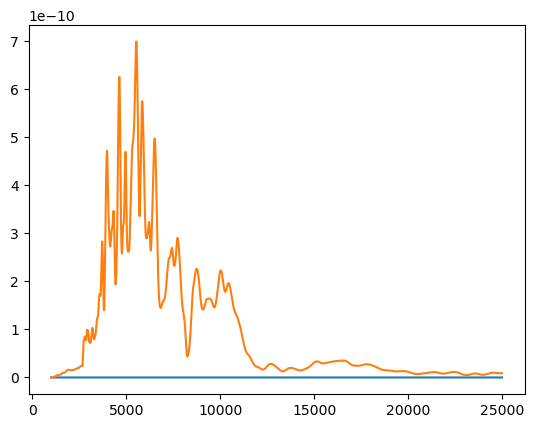

In [14]:
## evolution (3d space): flux vs. wavelength, all of that is a slice in time. 
plt.plot(snflux_1a[snflux_1a['col1'] == -20.0]['col2'], snflux_1a[snflux_1a['col1'] == -20.0]['col3'])
plt.plot(snflux_1a[snflux_1a['col1'] == 50.0]['col2'], snflux_1a[snflux_1a['col1'] == 50.0]['col3'])

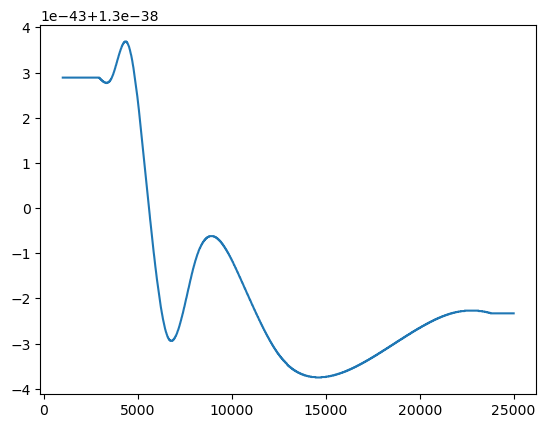

In [21]:
plt.plot(snflux_1a[snflux_1a['col1'] == -20.0]['col2'], snflux_1a[snflux_1a['col1'] == -20.0]['col3'])

In [27]:
np.unique(snflux_1a['col1'])

array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.])

In [2]:
import dust_extinction

ModuleNotFoundError: No module named 'dust_extinction'

In [3]:
from dust_extinction.parameter_averages import G23
from astropy.modeling.models import BlackBody
import astropy.units as u

extmod = G23(Rv=3.1)
wavelengths = np.logspace(np.log10(0.1), np.log10(30.0), num=1000)*u.micron
ext = extmod(wavelengths)


# wavelengths and spectrum are 1D arrays
# wavelengths between 1000 and 30000 A
wavelengths = np.logspace(np.log10(0.1), np.log10(30.0), num=1000)*u.micron
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
spectrum = bb_lam(wavelengths)

# extinguish (redden) the spectrum
spectrum_ext = spectrum*ext.extinguish(wavelengths, Ebv=0.5)

# unextinguish (deredden) the spectrum
# Av = 1.55 = R(V) * E(B-V) = 3.1 * 0.5
spectrum_noext = spectrum_ext/ext.extinguish(wavelengths, Av=1.55)

ModuleNotFoundError: No module named 'dust_extinction'